In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
emp = pd.read_csv("/content/drive/MyDrive/Datasets/Employeeds/train_employee_attrition.csv")

In [ ]:
emp

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0


# Data research

In [ ]:
emp.shape

(1677, 35)

In [ ]:
emp.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [ ]:
emp.dtypes

id                           int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [ ]:
emp.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [ ]:
emp.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [ ]:
emp.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [ ]:
for col in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']:
  vals = emp[col].unique()
  print(f'Unique values/classes in {col} are {vals}\n' )

Unique values/classes in BusinessTravel are ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']

Unique values/classes in Department are ['Research & Development' 'Sales' 'Human Resources']

Unique values/classes in EducationField are ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']

Unique values/classes in Gender are ['Male' 'Female']

Unique values/classes in JobRole are ['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']

Unique values/classes in MaritalStatus are ['Married' 'Divorced' 'Single']

Unique values/classes in Over18 are ['Y']

Unique values/classes in OverTime are ['Yes' 'No']



# Univariate Analysis

In [ ]:
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']
df1 = emp.copy()

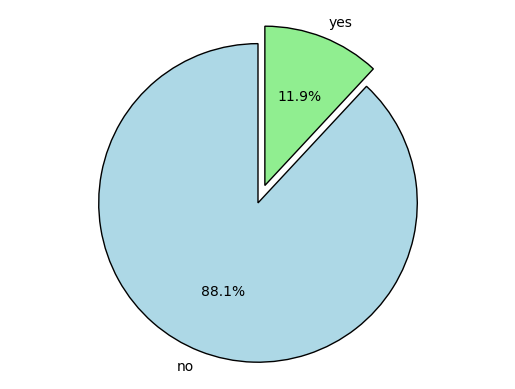

In [ ]:
x = ('no', 'yes')
y = list(df1['Attrition'].value_counts())
expl = (0.2, 0)
clr = ('LightBlue', 'LightGreen')
plt.pie(y, labels = x, colors = clr, explode = expl, autopct='%1.1f%%', startangle = 90, radius = 1.7, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_features:
    df1[col] = encoder.fit_transform(df1[col])

<ipython-input-15-113afa5d9eb2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[j]);
<ipython-input-15-113afa5d9eb2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[j]);
<ipython-input-15-113afa5d9eb2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

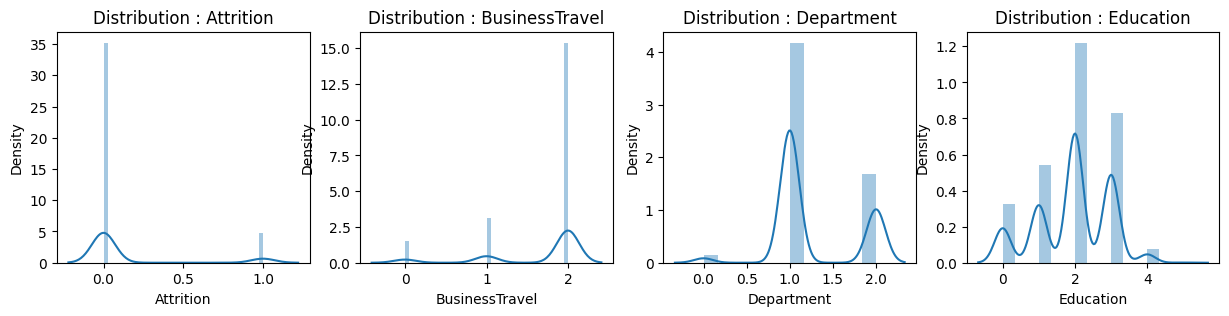

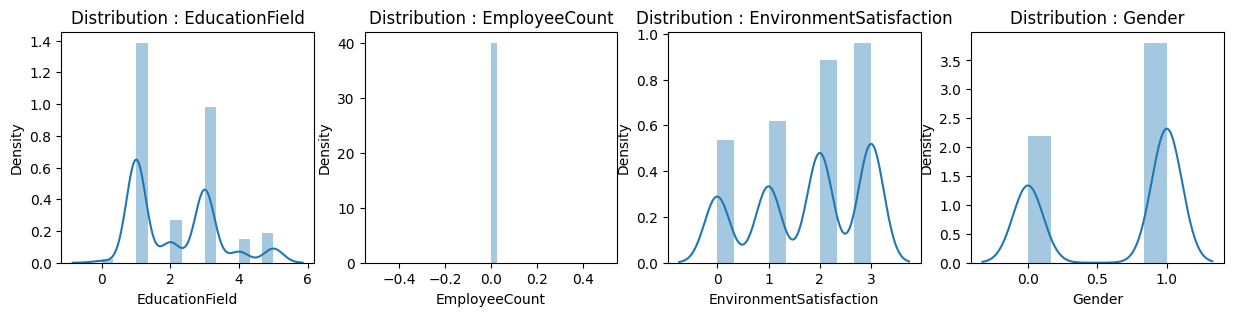

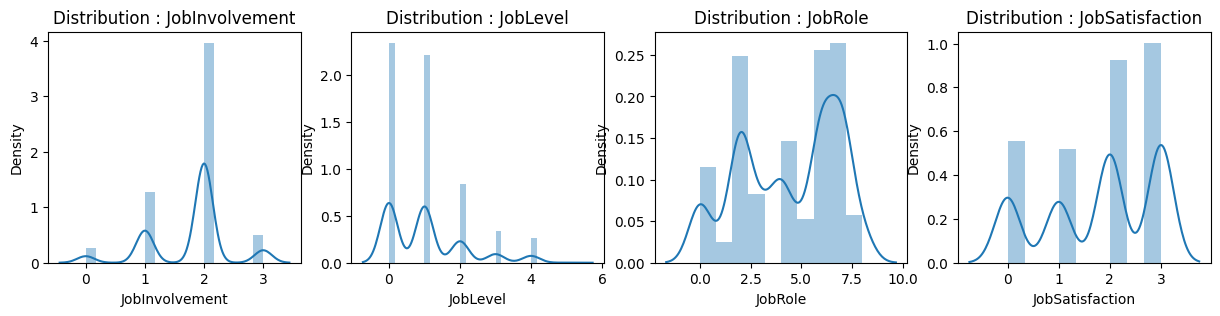

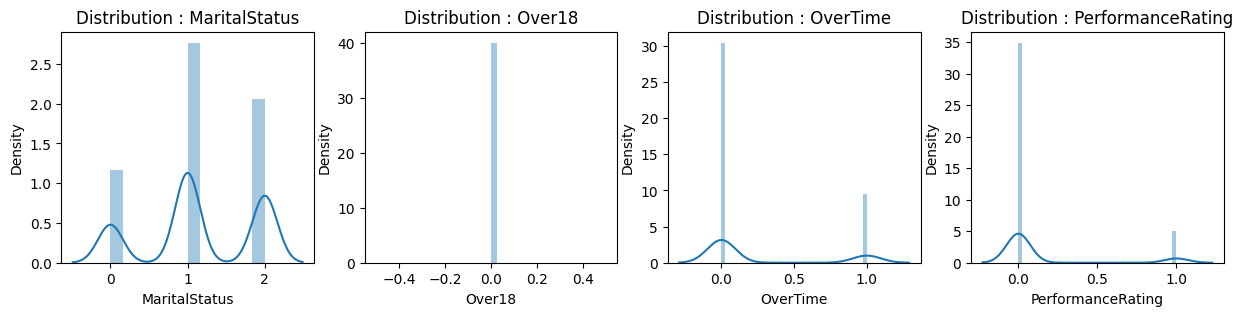

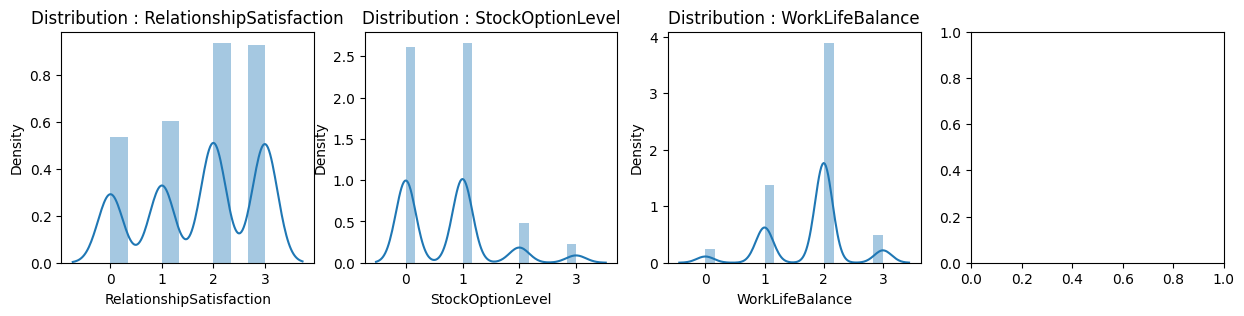

In [ ]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 4,figsize = (15,3))
    a = 1
    for j in categorical_features[(i*4) : (i*4) + 4]:
        plt.subplot(1,4,a)
        sns.distplot(df1[j]);
        plt.title('Distribution : ' + j)
        a += 1

<ipython-input-16-8268e0713b32>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[j]);
<ipython-input-16-8268e0713b32>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[j]);
<ipython-input-16-8268e0713b32>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

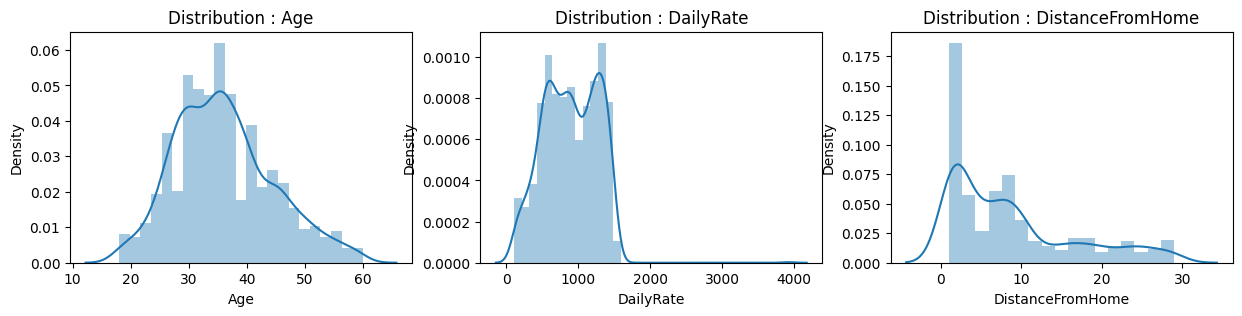

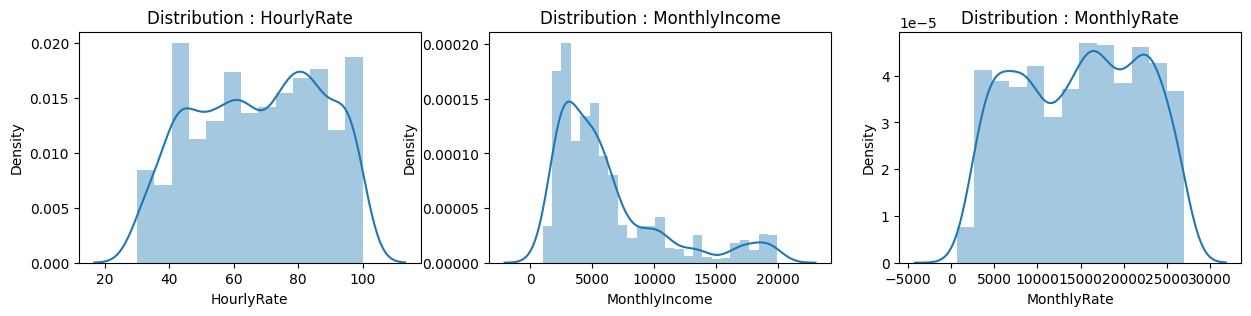

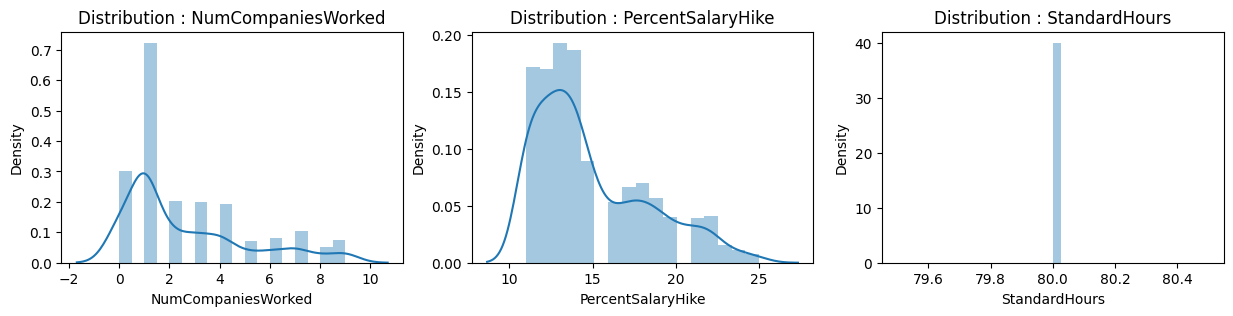

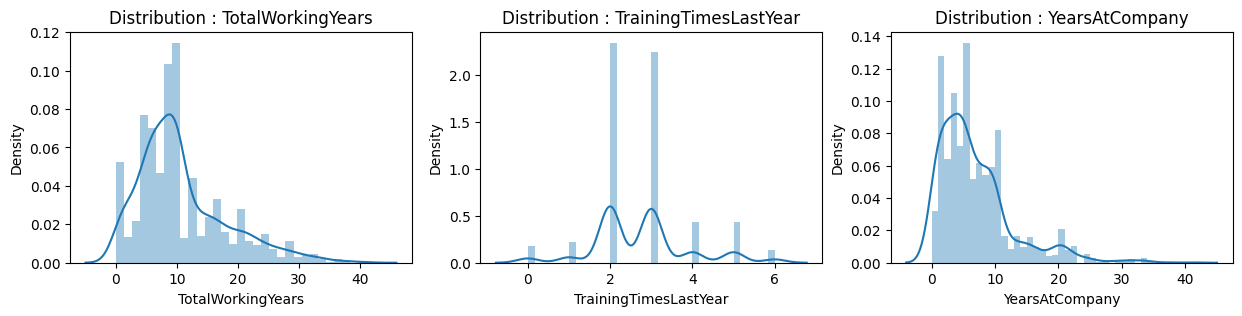

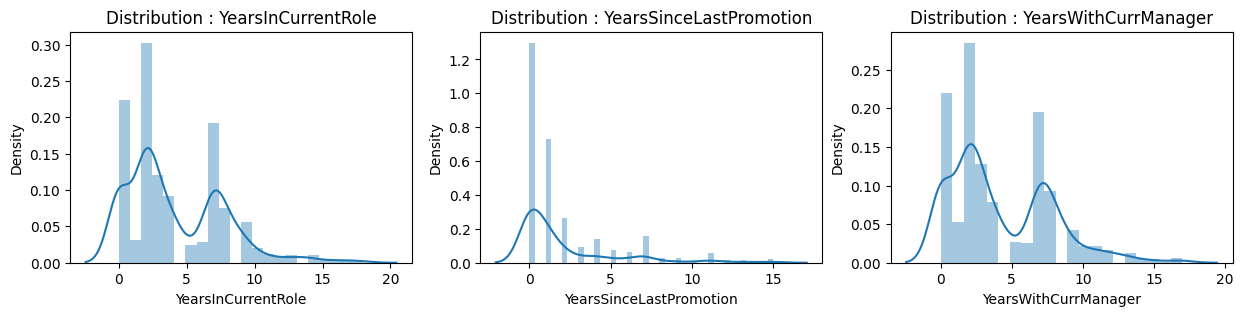

In [ ]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    a = 1
    for j in numerical_features[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a)
        sns.distplot(df1[j]);
        plt.title('Distribution : ' + j)
        a += 1

# Grouping Columns for Multivariate Analysis

In the dataset all the columns are describing various things like either about the employee or about the company. Hence it's obvioius that not all the columns are related to each other and should be analysed by grouping the columns based on it's characteristics.

The following groups are:
1. General Employee Information
2. Employee - Job Information
3. Employe - Company Information
4. Company Features
5. Finances

# Multivariate Analysis

### General Employee Information
The columns grouped under this catagory are:
1. Age
2. Gender
3. MaritalStatus
4. Education
5. DistanceFromHome
6. TotalWorkingYears
7. NumCompaniesWorked

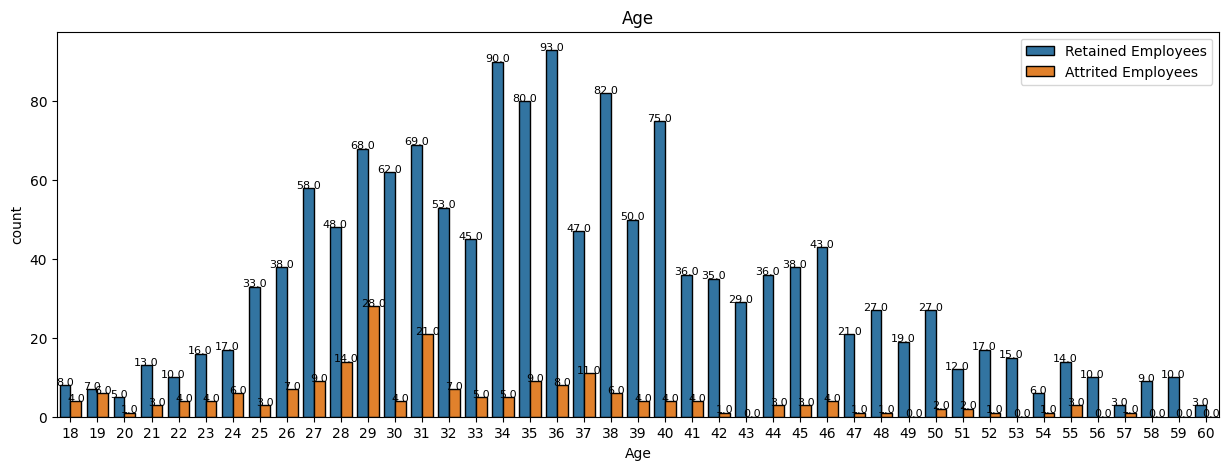

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'Age', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Age');

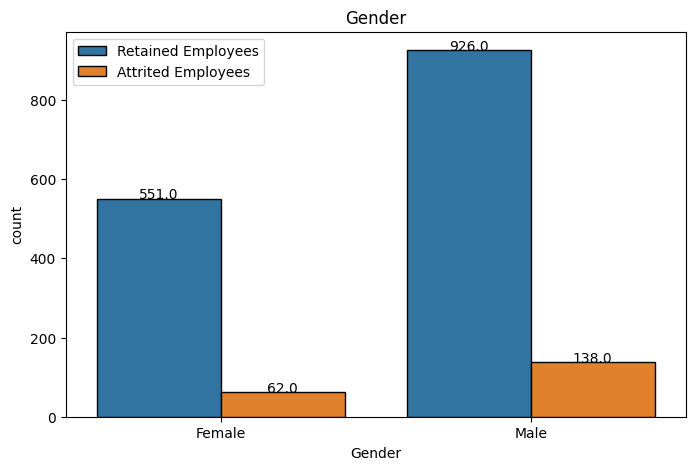

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = 'Gender', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['Female', 'Male']
x_pos = [0, 1]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper left')
plt.title('Gender');

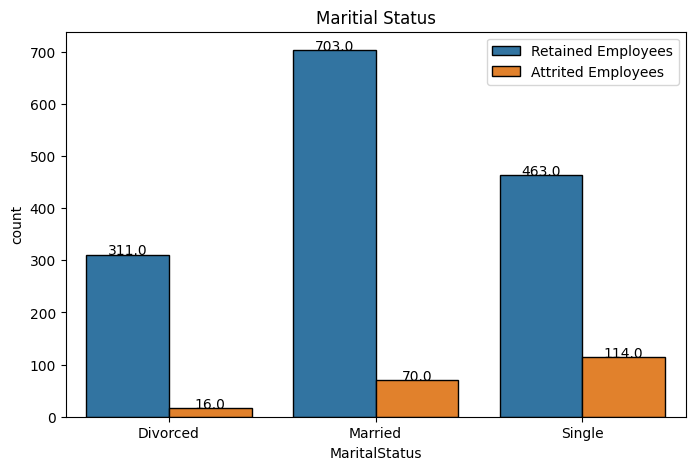

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = 'MaritalStatus', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['Divorced', 'Married', 'Single']
x_pos = [0, 1, 2]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Maritial Status');

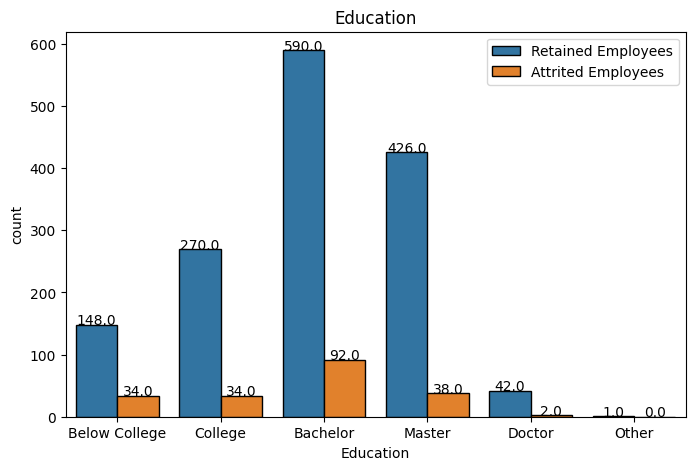

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = 'Education', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor', 'Other']
x_pos = [0, 1, 2, 3, 4, 5]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Education');

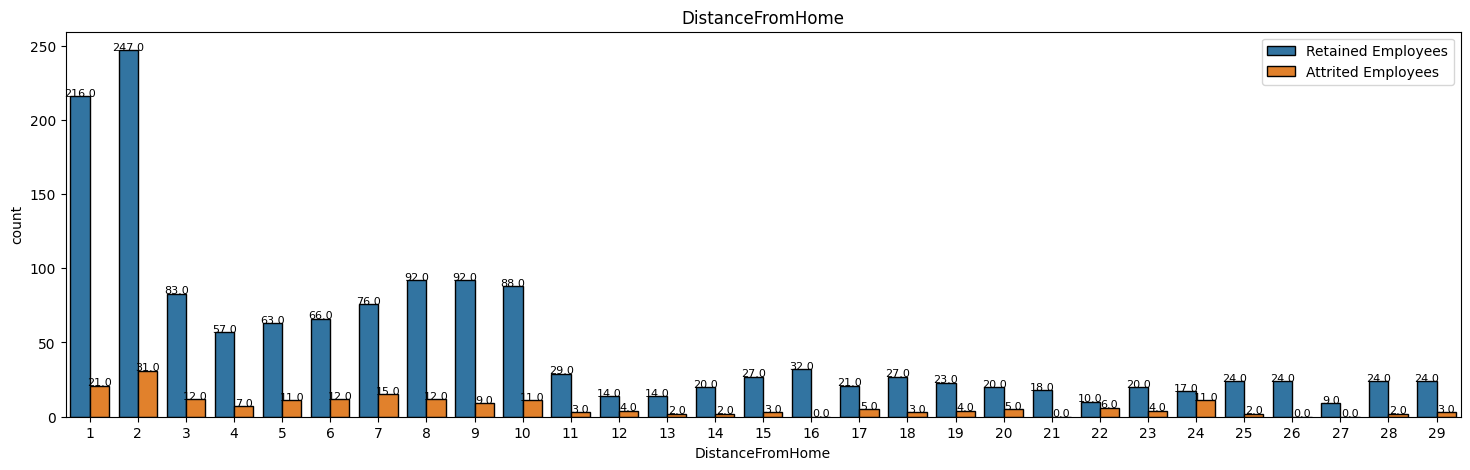

In [ ]:
plt.figure(figsize = (18,5))
ax = sns.countplot(x = 'DistanceFromHome', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('DistanceFromHome');

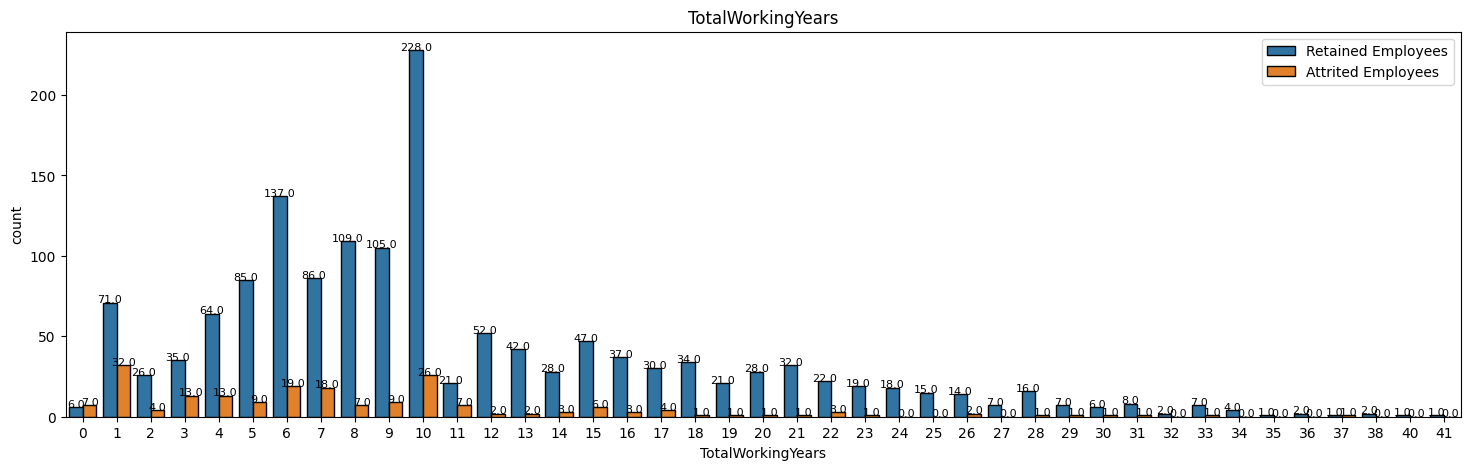

In [ ]:
plt.figure(figsize = (18,5))
ax = sns.countplot(x = 'TotalWorkingYears', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('TotalWorkingYears');

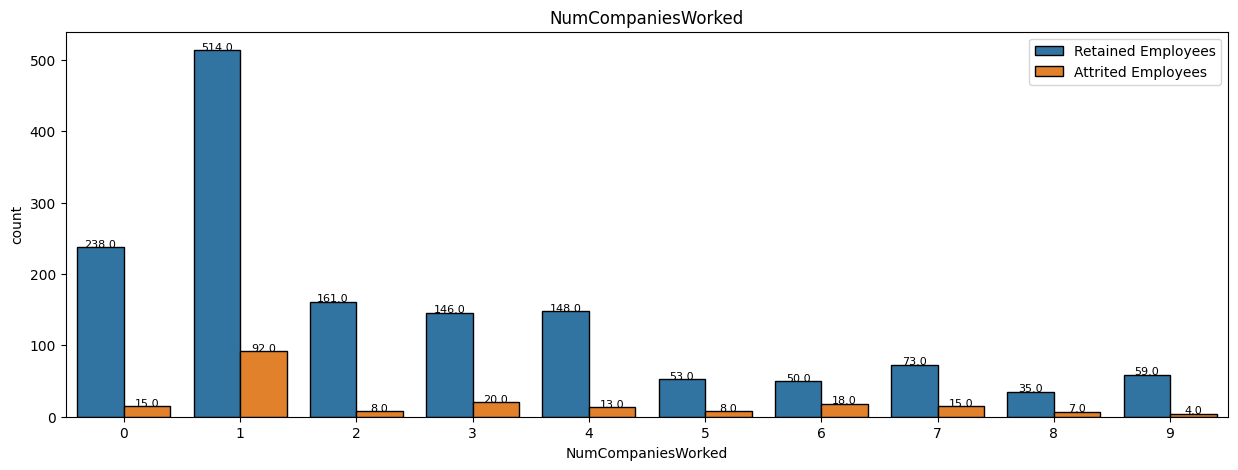

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'NumCompaniesWorked', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('NumCompaniesWorked');

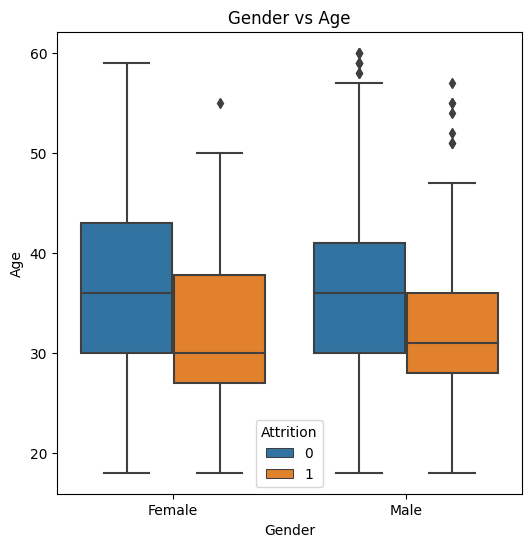

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'Gender', y = 'Age',hue = 'Attrition', data = df1)
#plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
x = ['Female', 'Male']
x_pos = [0, 1]
plt.xticks(x_pos,x)
plt.title('Gender vs Age');

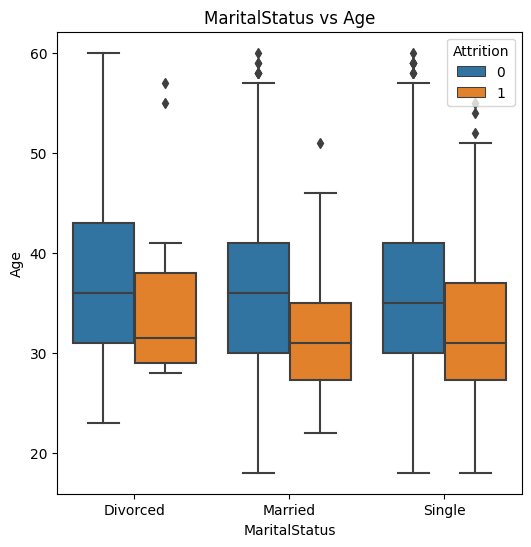

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'MaritalStatus', y = 'Age',hue = 'Attrition', data = df1)
#plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
x = ['Divorced', 'Married', 'Single']
x_pos = [0, 1, 2]
plt.xticks(x_pos,x)
plt.title('MaritalStatus vs Age');

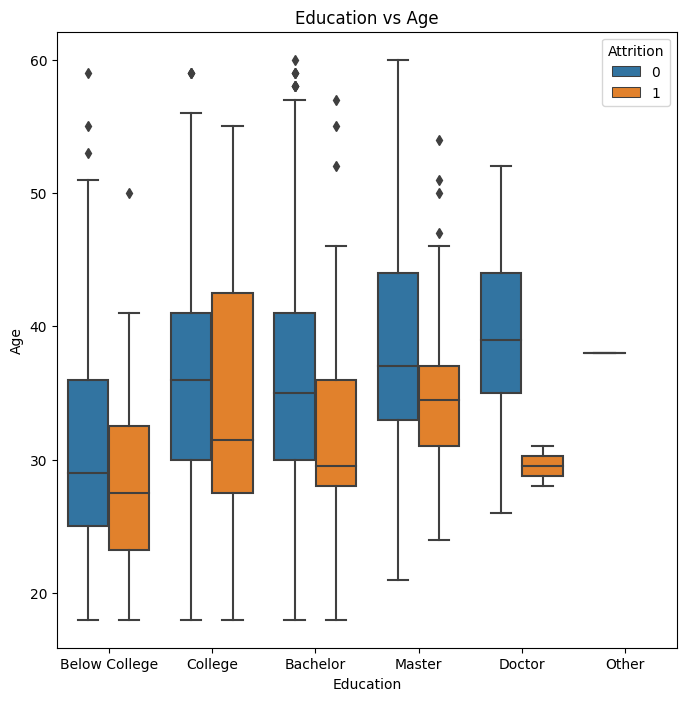

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Education', y = 'Age',hue = 'Attrition', data = df1)
#plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
x = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor', 'Other']
x_pos = [0, 1, 2, 3, 4, 5]
plt.xticks(x_pos,x)
plt.title('Education vs Age');

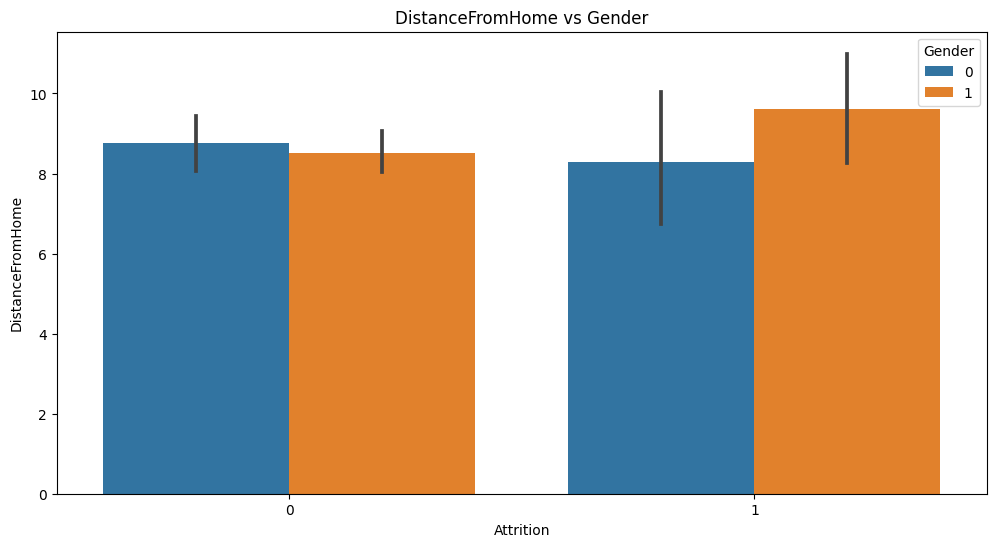

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Attrition',y = 'DistanceFromHome',hue = 'Gender', data = df1)
plt.title('DistanceFromHome vs Gender');

### Employee - Job Information

The columns grouped under this catagory are:
1. EducationField
2. Department
3. JobLevel
4. JobRole
5. JobInvolvement
5. OverTime
6. JobSatisfaction

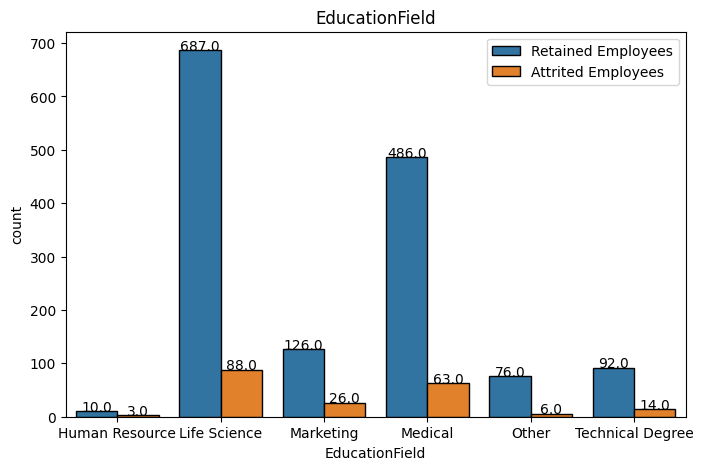

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = 'EducationField', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['Human Resource', 'Life Science', 'Marketing', 'Medical', 'Other', 'Technical Degree']
x_pos = [0, 1, 2, 3, 4, 5]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('EducationField');

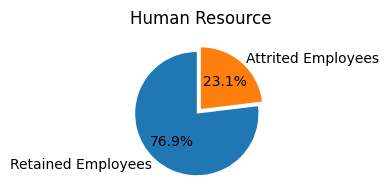

--------------------------------------------------------


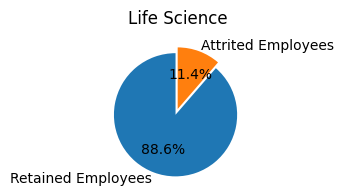

--------------------------------------------------------


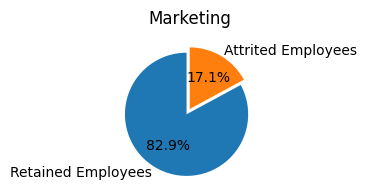

--------------------------------------------------------


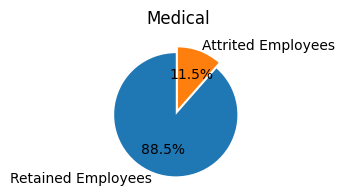

--------------------------------------------------------


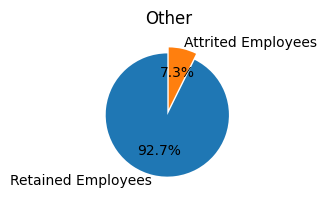

--------------------------------------------------------


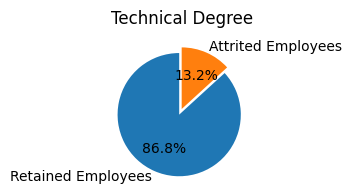

--------------------------------------------------------


In [ ]:
for i in range(len(df1['EducationField'].unique())):
  plt.figure(figsize = (2,2))
  x = ['Retained Employees', 'Attrited Employees']
  y = list(df1.loc[(df1['EducationField'] == i)]['Attrition'].value_counts())
  exp = [0.1,0]
  plt.pie(y, labels = x, explode = exp, autopct='%1.1f%%', startangle = 90, data=df1)
  if i == 0:
    plt.title('Human Resource')
  elif i == 1:
    plt.title('Life Science')
  elif i == 2:
    plt.title('Marketing')
  elif i == 3:
    plt.title('Medical')
  elif i == 4:
    plt.title('Other')
  else:
    plt.title('Technical Degree')
  plt.show()
  print('--------------------------------------------------------')

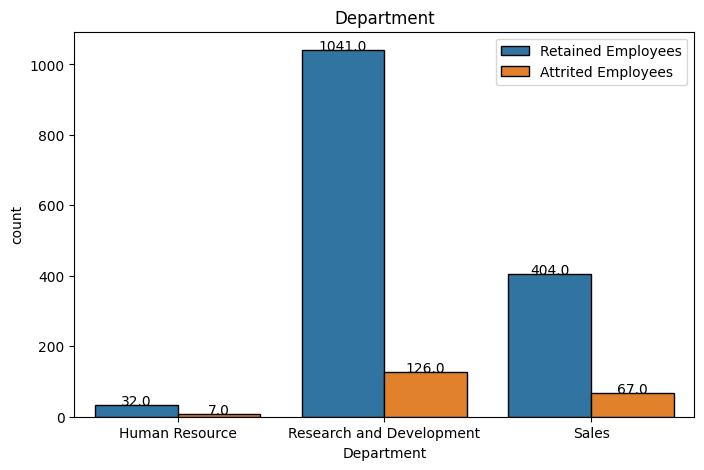

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = 'Department', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['Human Resource', 'Research and Development', 'Sales']
x_pos = [0, 1, 2]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Department');

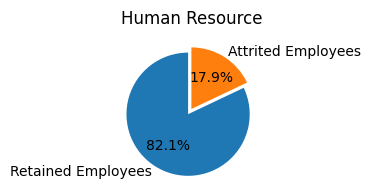

--------------------------------------------------------


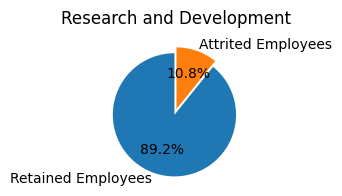

--------------------------------------------------------


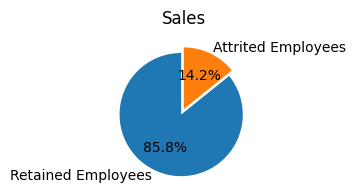

--------------------------------------------------------


In [ ]:
for i in range(len(df1['Department'].unique())):
  plt.figure(figsize = (2,2))
  x = ['Retained Employees', 'Attrited Employees']
  y = list(df1.loc[(df1['Department'] == i)]['Attrition'].value_counts())
  exp = [0.1,0]
  plt.pie(y, labels = x, explode = exp, autopct='%1.1f%%', startangle = 90, data=df1)
  if i == 0:
    plt.title('Human Resource')
  elif i == 1:
    plt.title('Research and Development')
  else:
    plt.title('Sales')
  plt.show()
  print('--------------------------------------------------------')

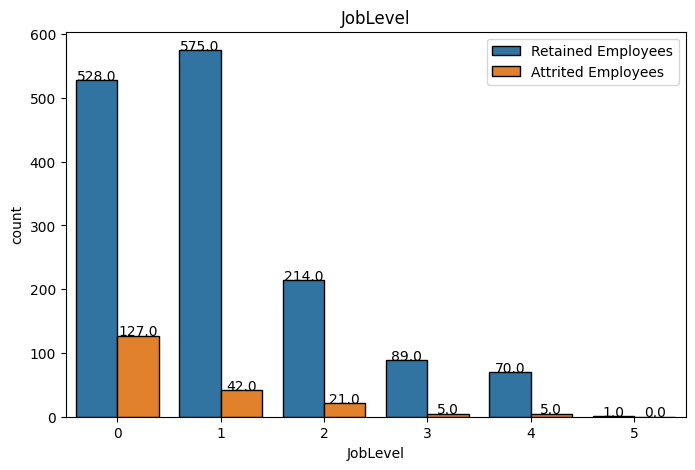

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = 'JobLevel', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['0', '1', '2', '3', '4', '5']
x_pos = [0, 1, 2, 3, 4, 5]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('JobLevel');

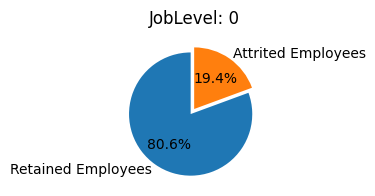

--------------------------------------------------------


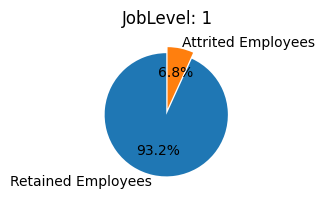

--------------------------------------------------------


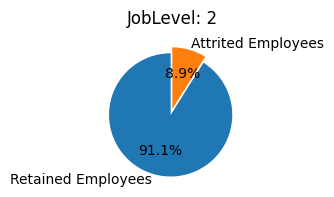

--------------------------------------------------------


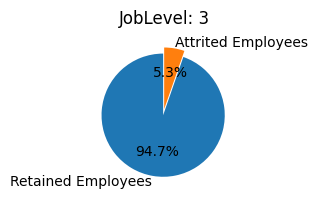

--------------------------------------------------------


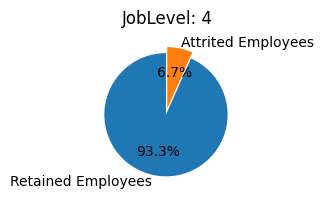

--------------------------------------------------------


In [ ]:
for i in range(len(df1['JobLevel'].unique()) - 1):
  plt.figure(figsize = (2,2))
  x = ['Retained Employees', 'Attrited Employees']
  y = list(df1.loc[(df1['JobLevel'] == i)]['Attrition'].value_counts())
  exp = [0.1,0]
  plt.pie(y, labels = x, explode = exp, autopct='%1.1f%%', startangle = 90, data=df1)
  if i == 0:
    plt.title('JobLevel: 0')
  elif i == 1:
    plt.title('JobLevel: 1')
  elif i == 2:
    plt.title('JobLevel: 2')
  elif i == 3:
    plt.title('JobLevel: 3')
  else:
    plt.title('JobLevel: 4')
  plt.show()
  print('--------------------------------------------------------')

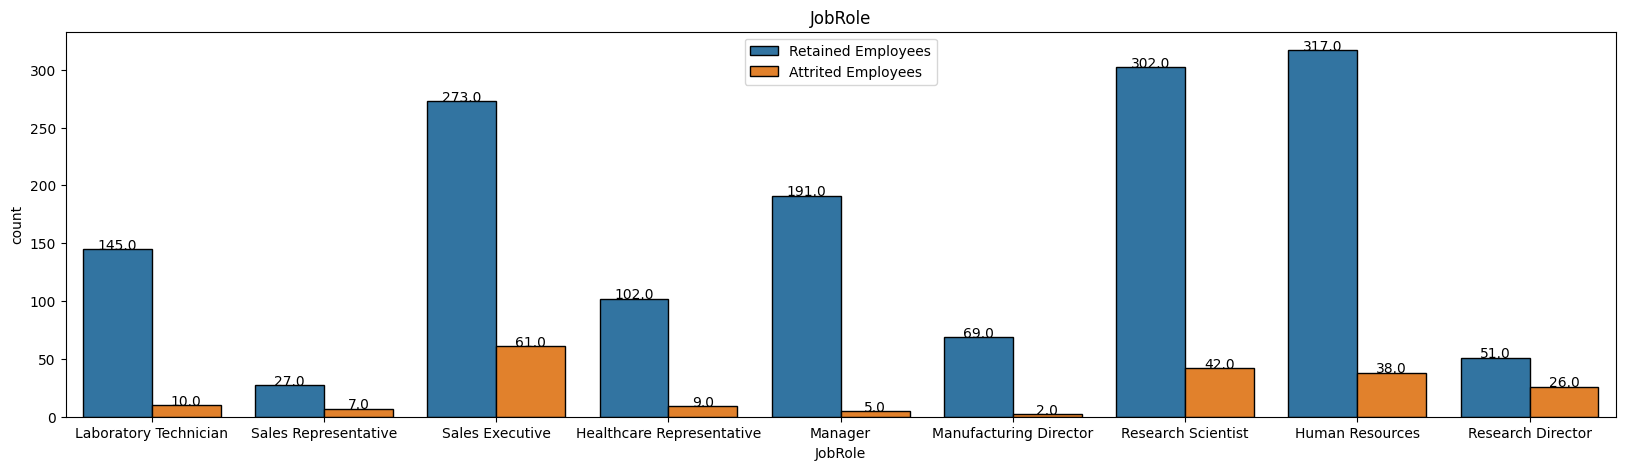

In [ ]:
plt.figure(figsize = (20,5))
ax = sns.countplot(x = 'JobRole', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['Laboratory Technician', 'Sales Representative', 'Sales Executive', 'Healthcare Representative', 'Manager', 'Manufacturing Director', 'Research Scientist', 'Human Resources', 'Research Director']
x_pos = [0, 1, 2, 3, 4, 5, 6, 7, 8]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper center')
plt.title('JobRole');

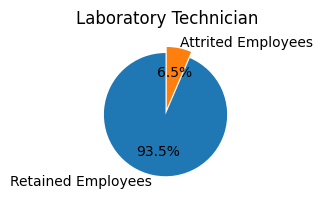

--------------------------------------------------------


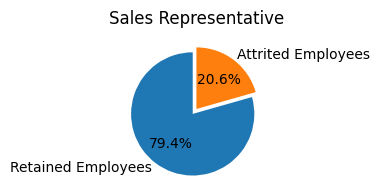

--------------------------------------------------------


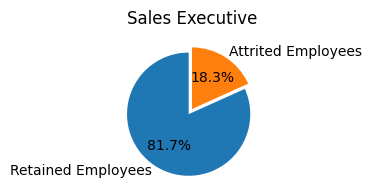

--------------------------------------------------------


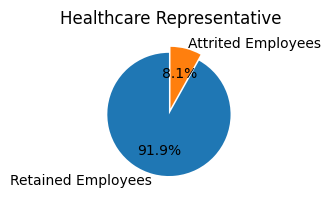

--------------------------------------------------------


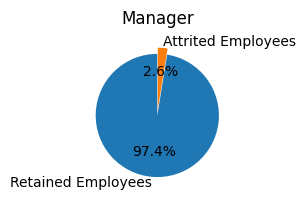

--------------------------------------------------------


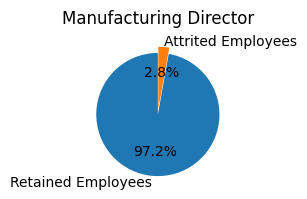

--------------------------------------------------------


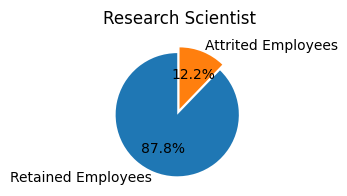

--------------------------------------------------------


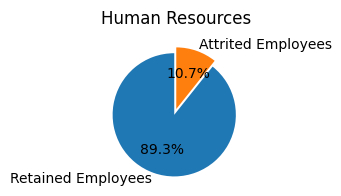

--------------------------------------------------------


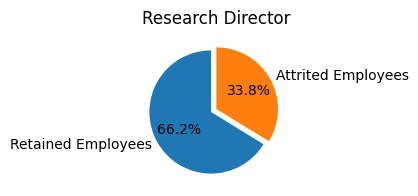

--------------------------------------------------------


In [ ]:
for i in range(len(df1['JobRole'].unique())):
  plt.figure(figsize = (2,2))
  x = ['Retained Employees', 'Attrited Employees']
  y = list(df1.loc[(df1['JobRole'] == i)]['Attrition'].value_counts())
  exp = [0.1,0]
  plt.pie(y, labels = x, explode = exp, autopct='%1.1f%%', startangle = 90, data=df1)
  if i == 0:
    plt.title('Laboratory Technician')
  elif i == 1:
    plt.title('Sales Representative')
  elif i == 2:
    plt.title('Sales Executive')
  elif i == 3:
    plt.title('Healthcare Representative')
  elif i == 4:
    plt.title('Manager')
  elif i == 5:
    plt.title('Manufacturing Director')
  elif i == 6:
    plt.title('Research Scientist')
  elif i == 7:
    plt.title('Human Resources')
  else:
    plt.title('Research Director')
  plt.show()
  print('--------------------------------------------------------')

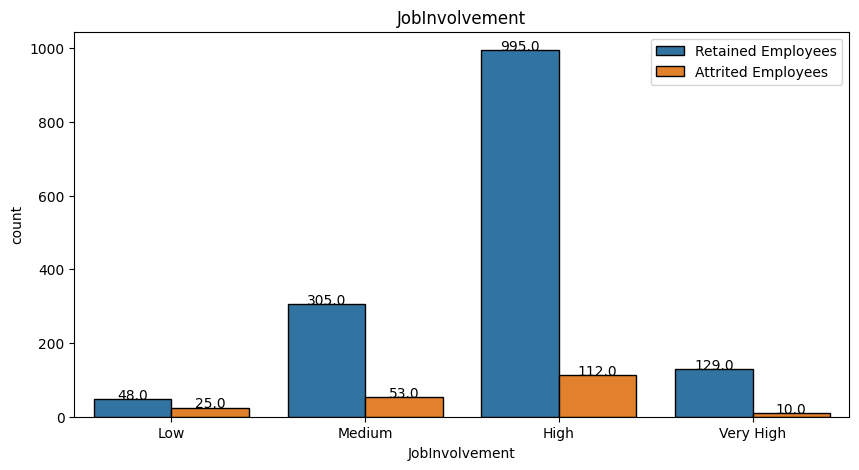

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'JobInvolvement', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['Low', 'Medium', 'High', 'Very High']
x_pos = [0, 1, 2, 3,]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('JobInvolvement');

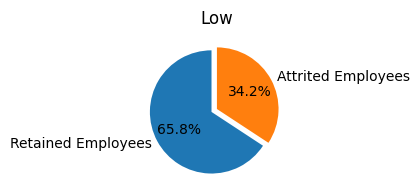

--------------------------------------------------------


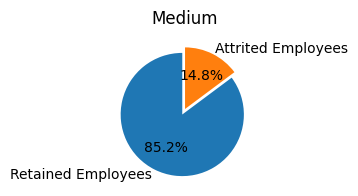

--------------------------------------------------------


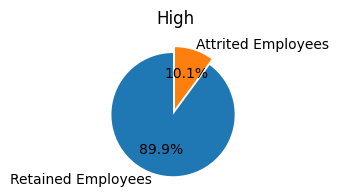

--------------------------------------------------------


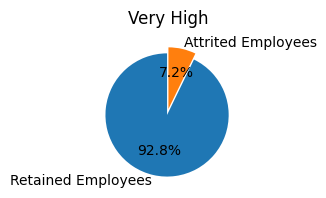

--------------------------------------------------------


In [ ]:
for i in range(len(df1['JobInvolvement'].unique())):
  plt.figure(figsize = (2,2))
  x = ['Retained Employees', 'Attrited Employees']
  y = list(df1.loc[(df1['JobInvolvement'] == i)]['Attrition'].value_counts())
  exp = [0.1,0]
  plt.pie(y, labels = x, explode = exp, autopct='%1.1f%%', startangle = 90, data=df1)
  if i == 0:
    plt.title('Low')
  elif i == 1:
    plt.title('Medium')
  elif i == 2:
    plt.title('High')
  else:
    plt.title('Very High')
  plt.show()
  print('--------------------------------------------------------')

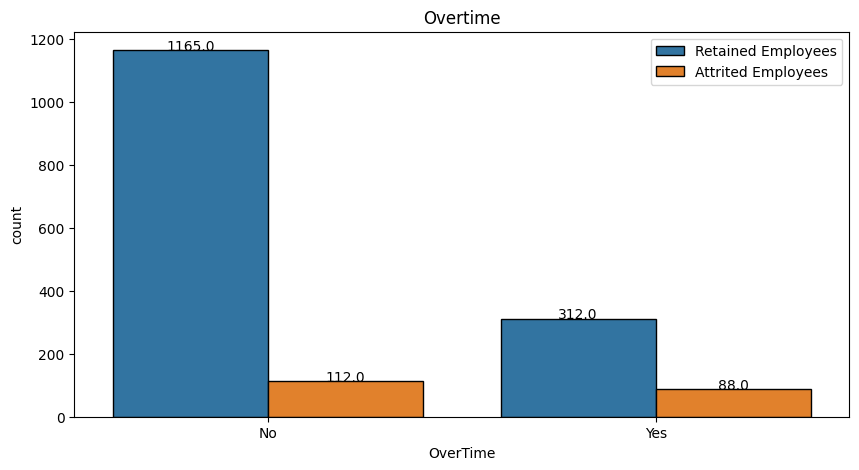

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'OverTime', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['No', 'Yes']
x_pos = [0, 1]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Overtime');

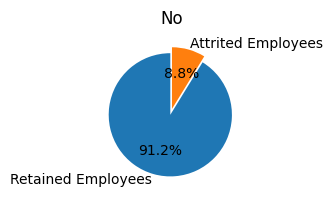

--------------------------------------------------------


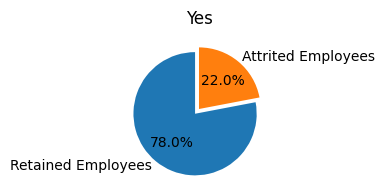

--------------------------------------------------------


In [ ]:
for i in range(len(df1['OverTime'].unique())):
  plt.figure(figsize = (2,2))
  x = ['Retained Employees', 'Attrited Employees']
  y = list(df1.loc[(df1['OverTime'] == i)]['Attrition'].value_counts())
  exp = [0.1,0]
  plt.pie(y, labels = x, explode = exp, autopct='%1.1f%%', startangle = 90, data=df1)
  if i == 0:
    plt.title('No')
  else:
    plt.title('Yes')
  plt.show()
  print('--------------------------------------------------------')

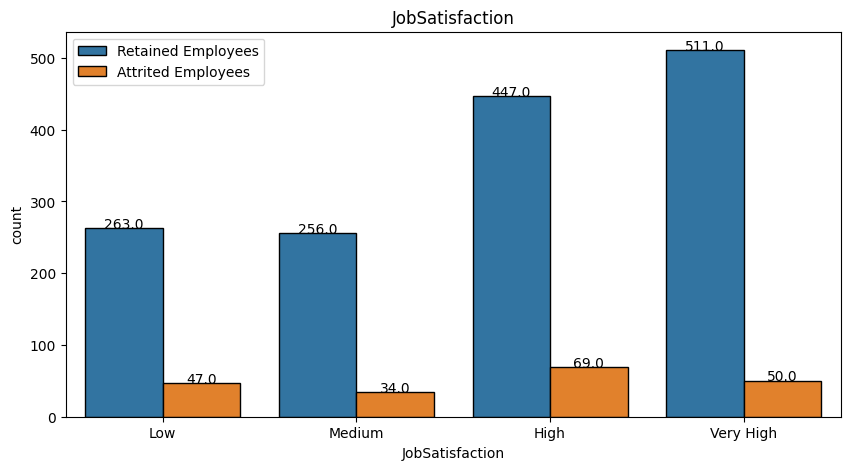

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'JobSatisfaction', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 10)
x = ['Low', 'Medium', 'High', 'Very High']
x_pos = [0, 1, 2, 3,]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper left')
plt.title('JobSatisfaction');

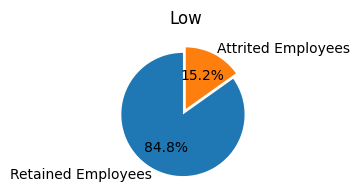

--------------------------------------------------------


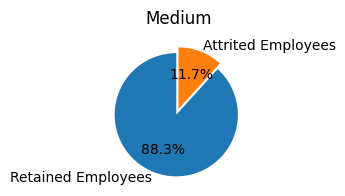

--------------------------------------------------------


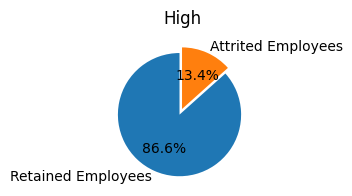

--------------------------------------------------------


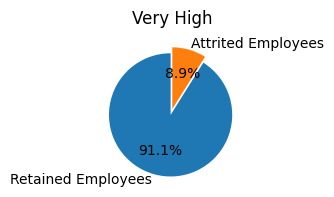

--------------------------------------------------------


In [ ]:
for i in range(len(df1['JobSatisfaction'].unique())):
  plt.figure(figsize = (2,2))
  x = ['Retained Employees', 'Attrited Employees']
  y = list(df1.loc[(df1['JobSatisfaction'] == i)]['Attrition'].value_counts())
  exp = [0.1,0]
  plt.pie(y, labels = x, explode = exp, autopct='%1.1f%%', startangle = 90, data=df1)
  if i == 0:
    plt.title('Low')
  elif i == 1:
    plt.title('Medium')
  elif i == 2:
    plt.title('High')
  else:
    plt.title('Very High')
  plt.show()
  print('--------------------------------------------------------')

### Employee - Company Information

The columns grouped under this catagory are:
1. YearsAtCompany
2. YearsInCurrentRole
3. YearsWithCurrManager
4. YearsSinceLastPromotion
5. TrainingTimesLastYear
6. WorkLifeBalance

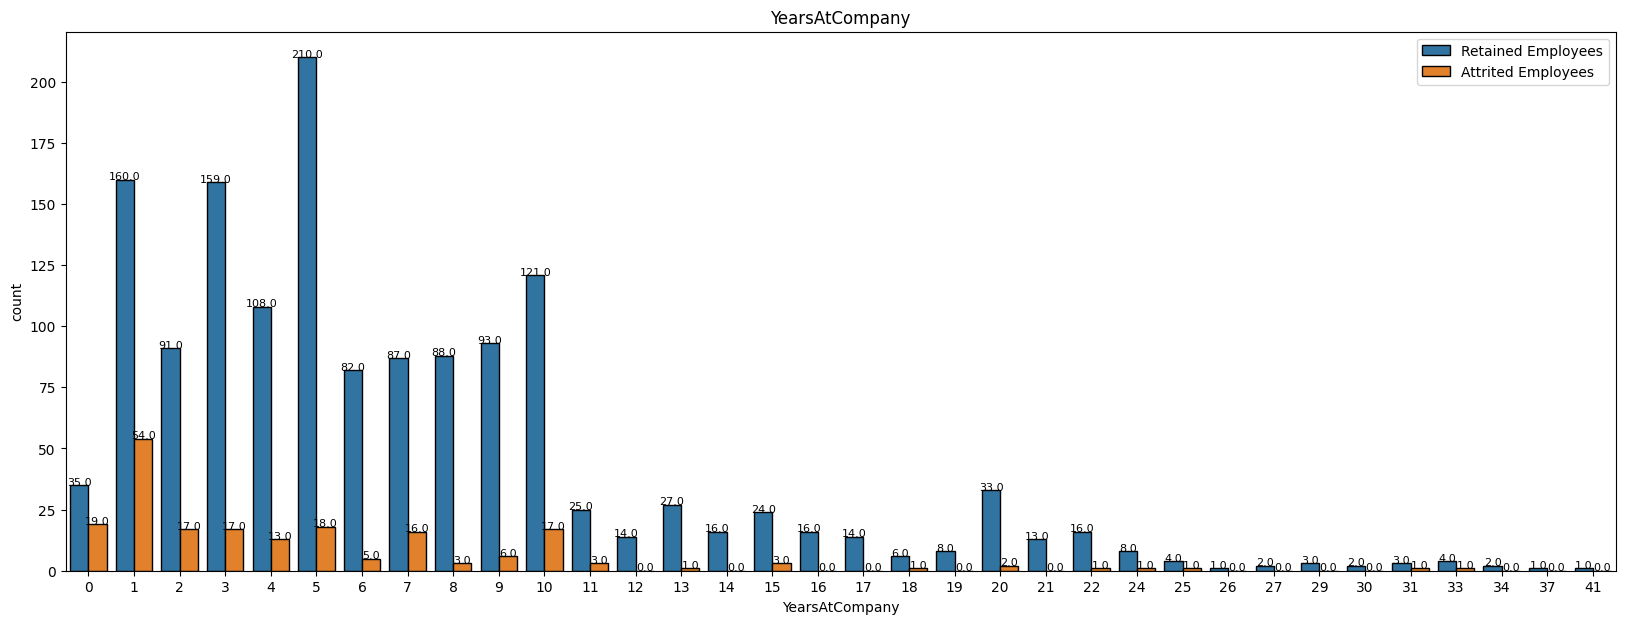

In [ ]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x = 'YearsAtCompany', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('YearsAtCompany');

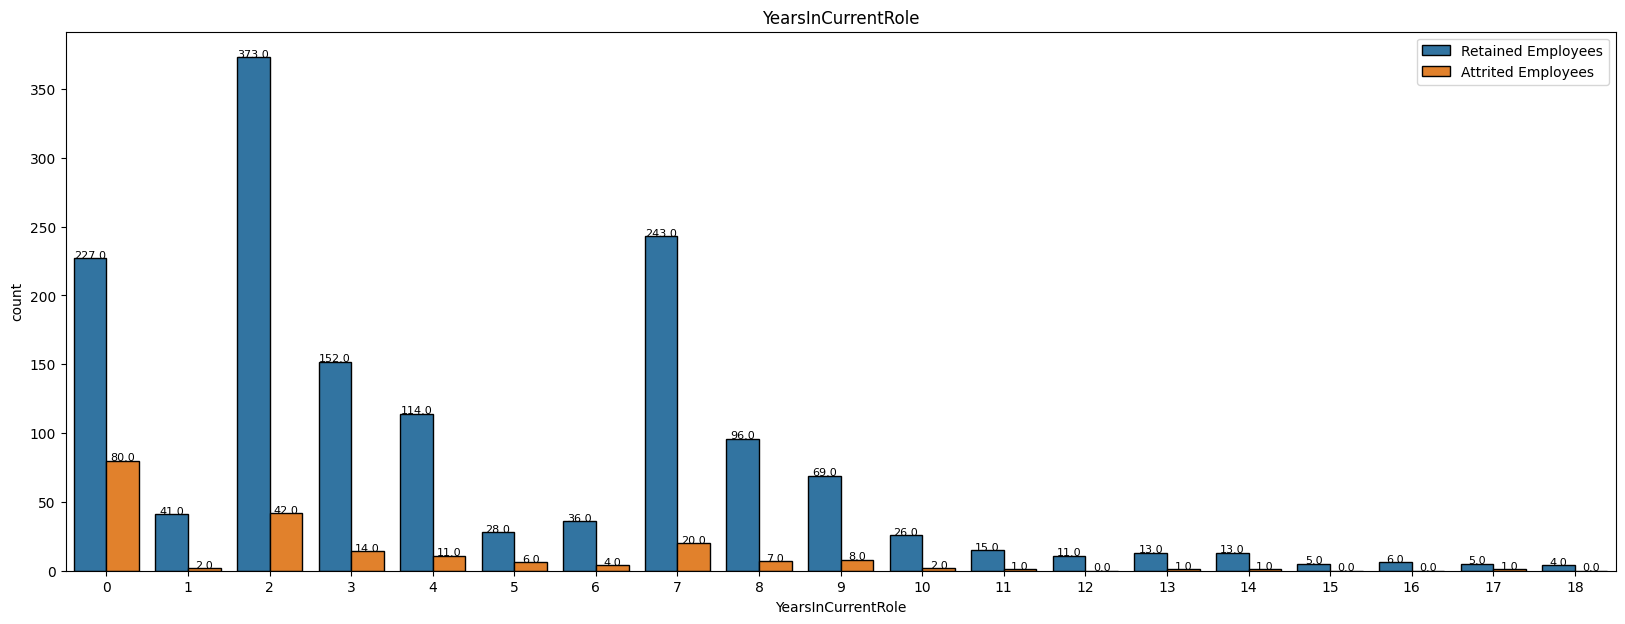

In [ ]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x = 'YearsInCurrentRole', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('YearsInCurrentRole');

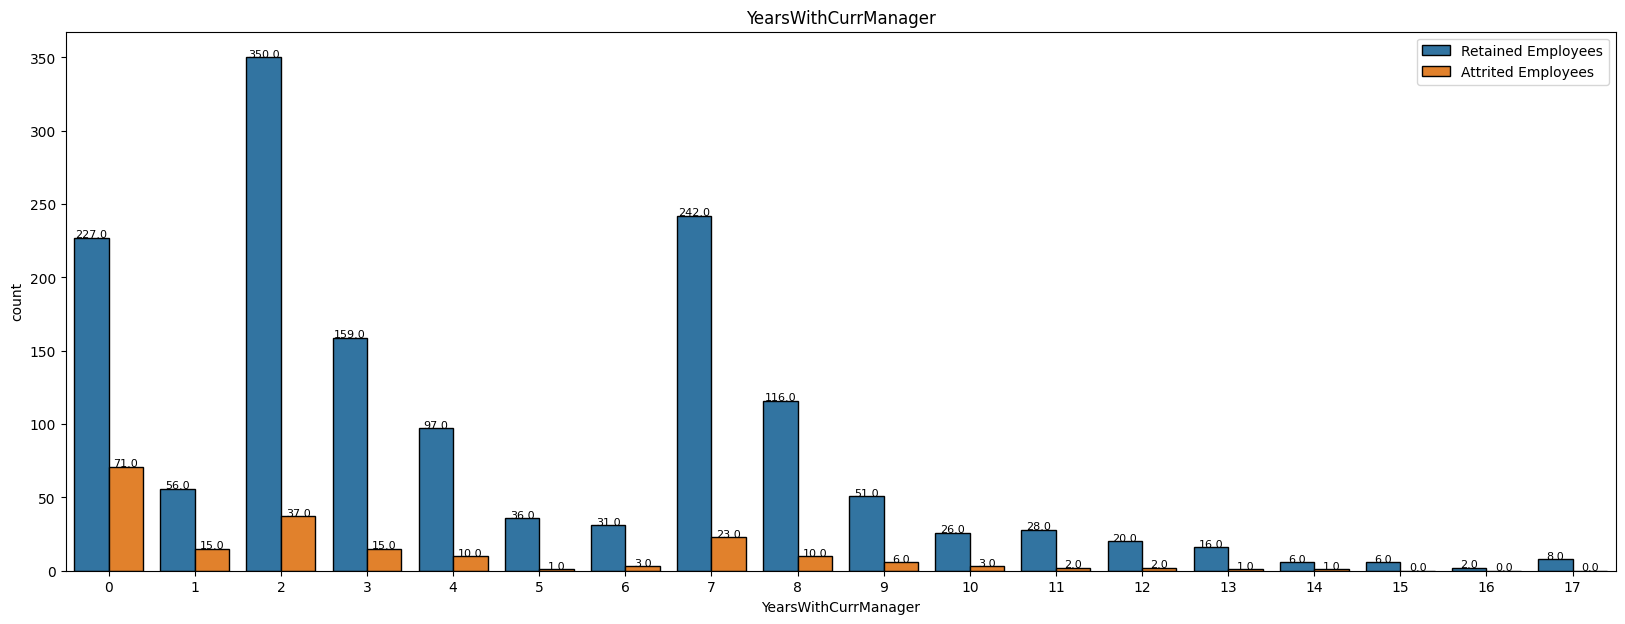

In [ ]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x = 'YearsWithCurrManager', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('YearsWithCurrManager');

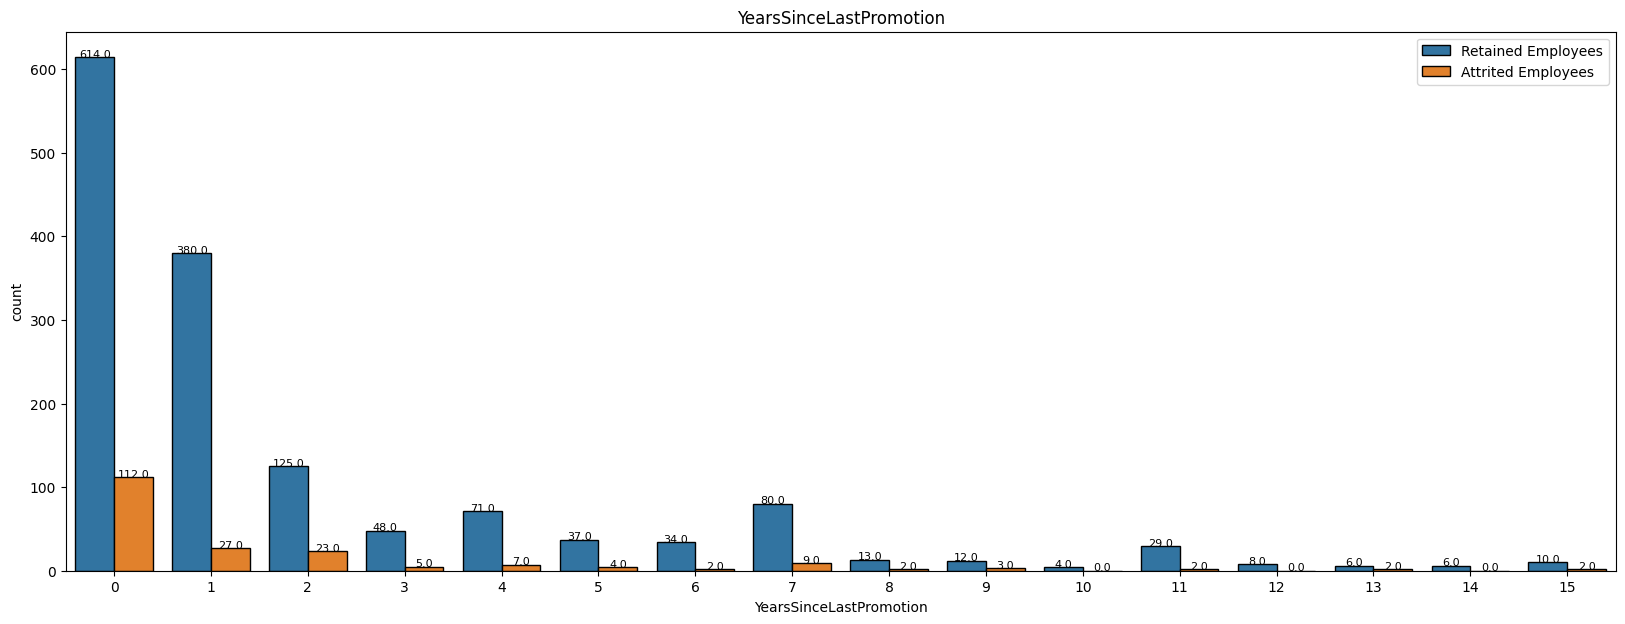

In [ ]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x = 'YearsSinceLastPromotion', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('YearsSinceLastPromotion');

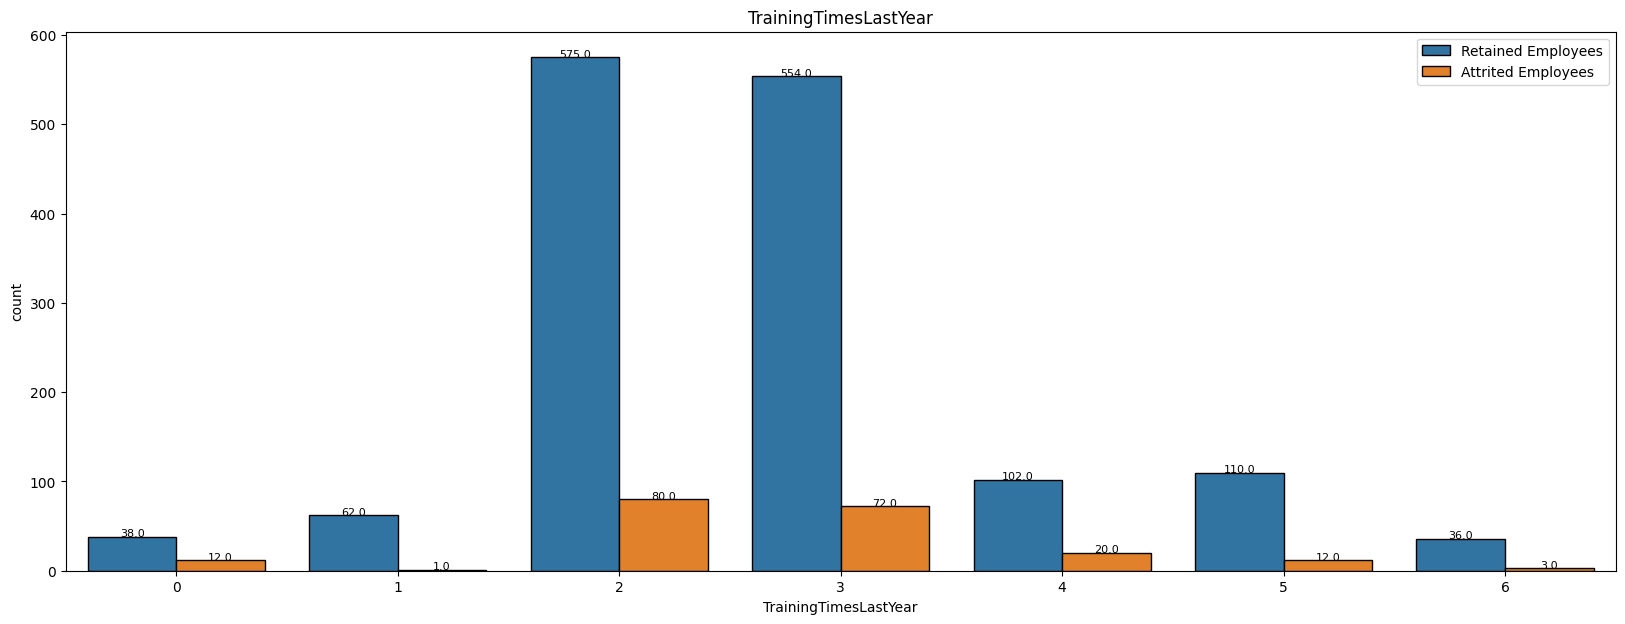

In [ ]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x = 'TrainingTimesLastYear', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('TrainingTimesLastYear');

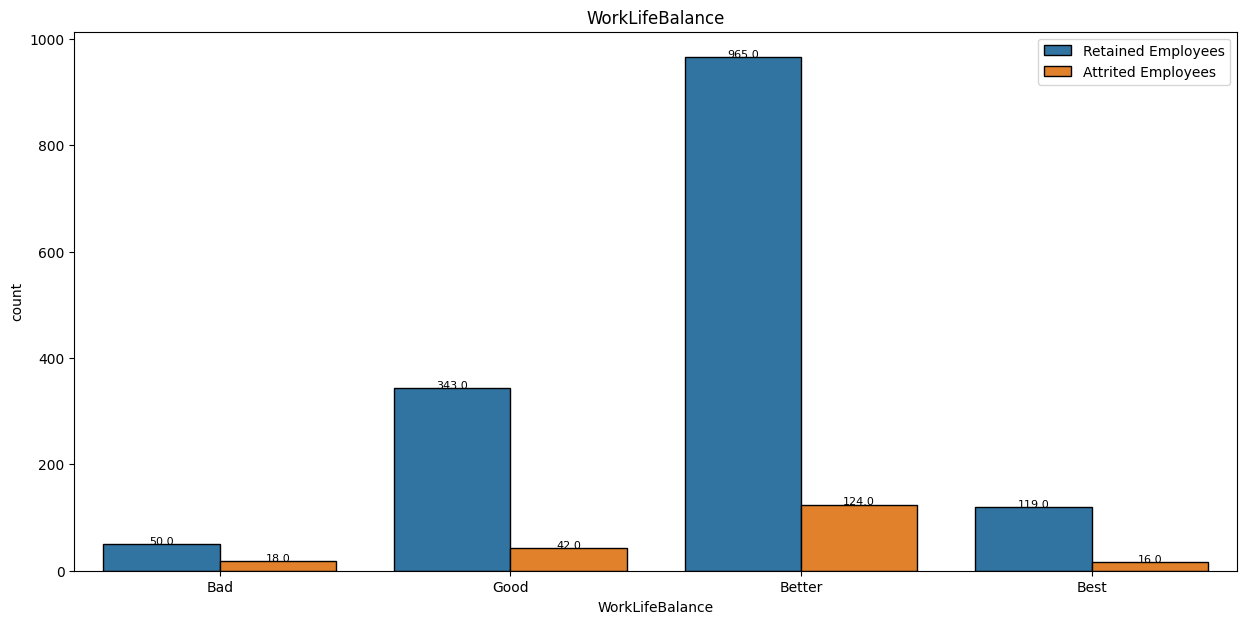

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.countplot(x = 'WorkLifeBalance', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
x = ['Bad', 'Good', 'Better', 'Best']
x_pos = [0, 1, 2, 3]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('WorkLifeBalance');

### Company Features

The columns grouped under this catagory are:

1. PercentSalaryHike
2. StockOptionLevel
3. BusinessTravel
4. PerformanceRating
5. EnvironmentSatisfaction
6. RelationshipSatisfaction

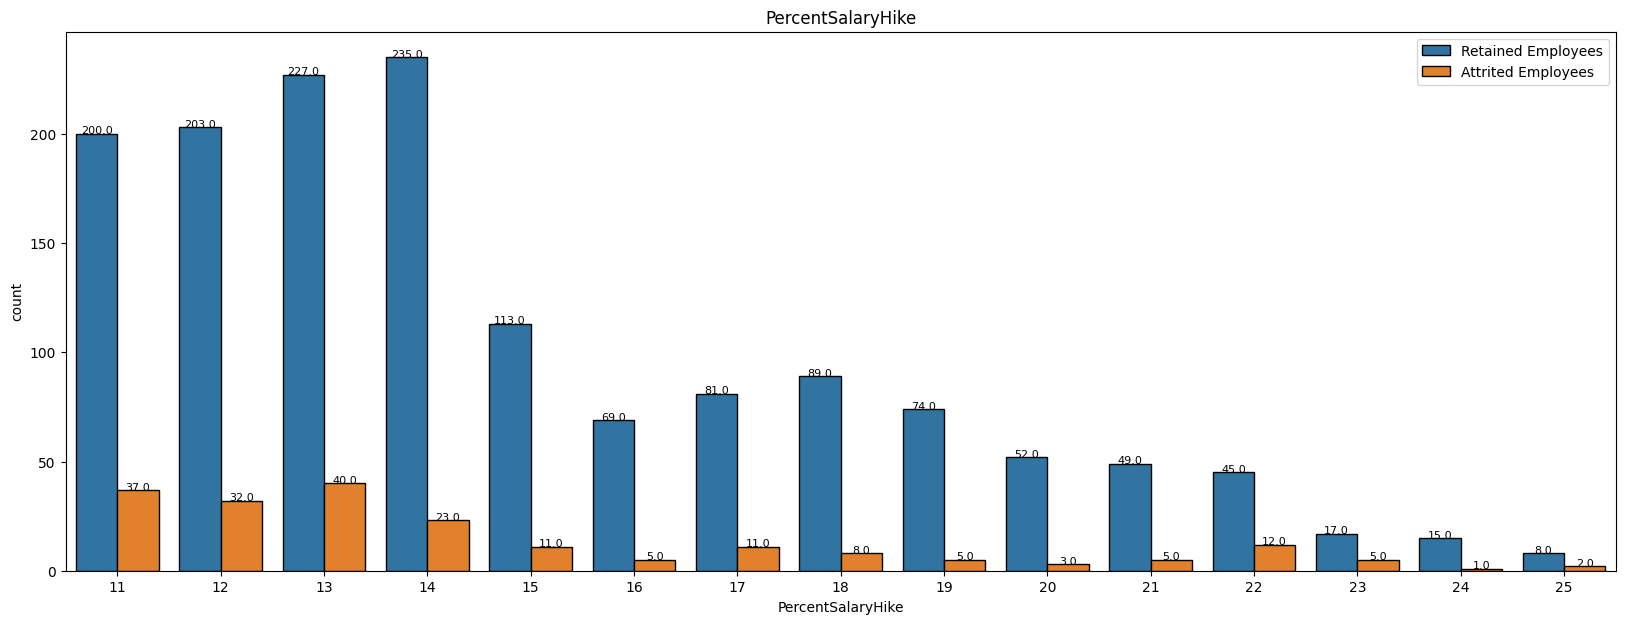

In [ ]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x = 'PercentSalaryHike', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('PercentSalaryHike');

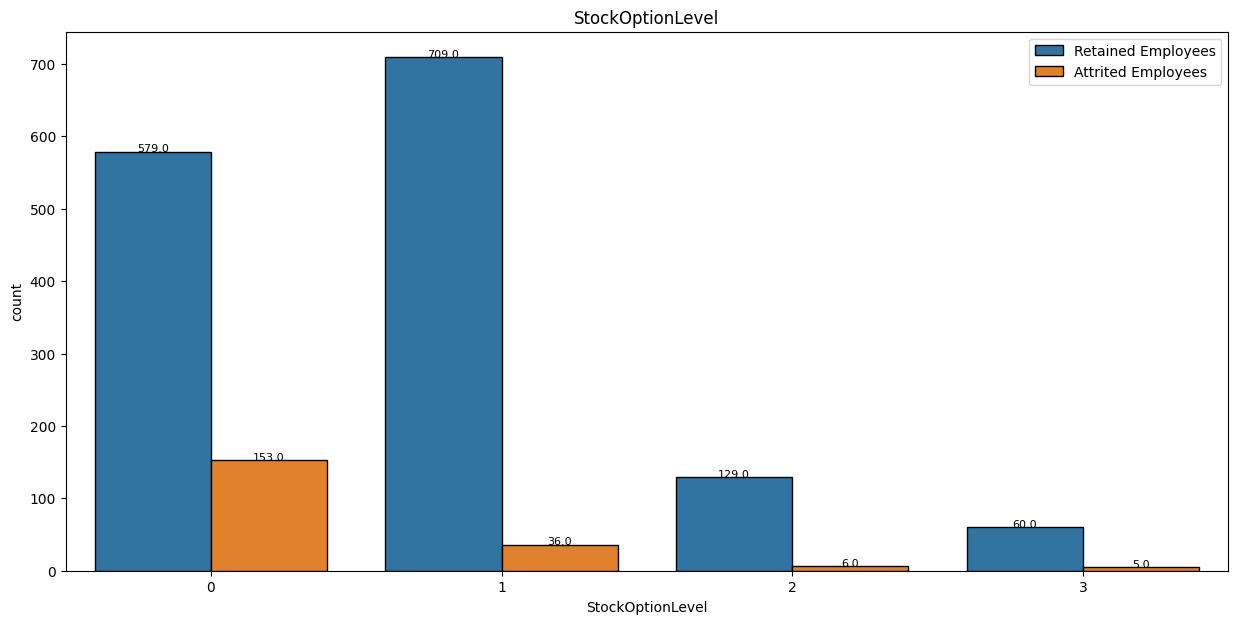

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.countplot(x = 'StockOptionLevel', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('StockOptionLevel');

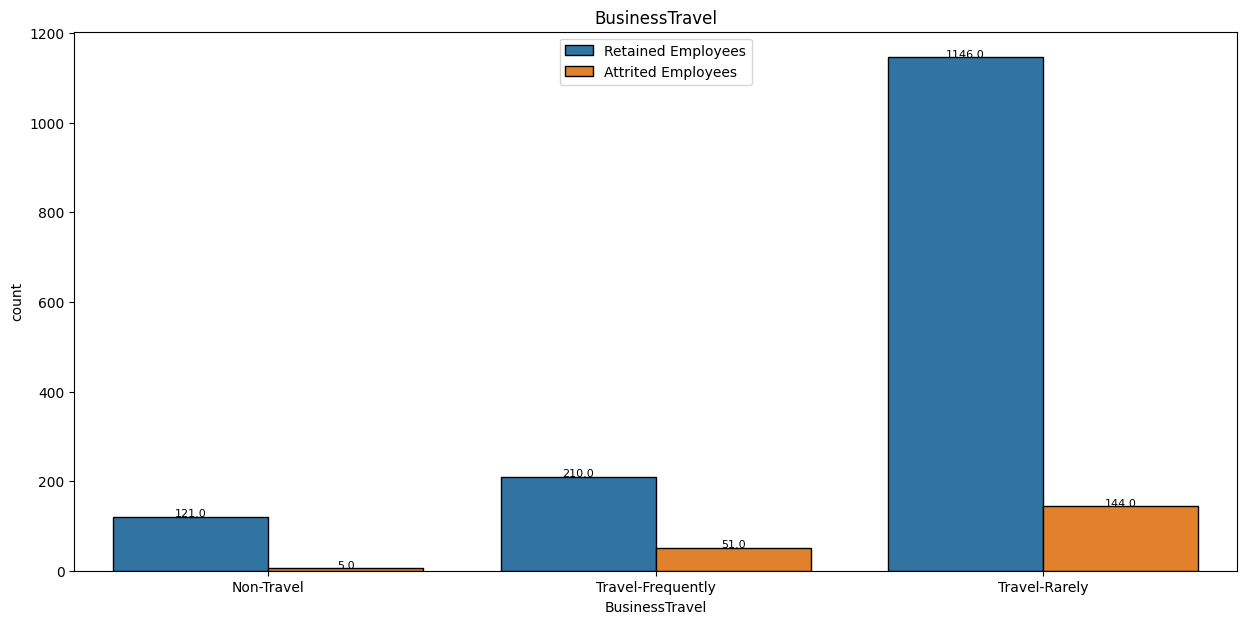

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.countplot(x = 'BusinessTravel', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
x = ['Non-Travel', 'Travel-Frequently', 'Travel-Rarely']
x_pos = [0, 1, 2]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper center')
plt.title('BusinessTravel');

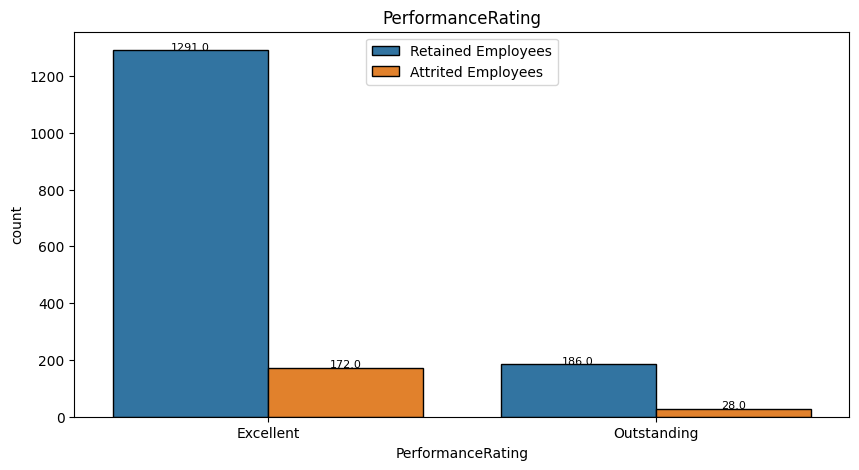

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'PerformanceRating', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
x = ['Excellent', 'Outstanding']
x_pos = [0, 1]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper center')
plt.title('PerformanceRating');

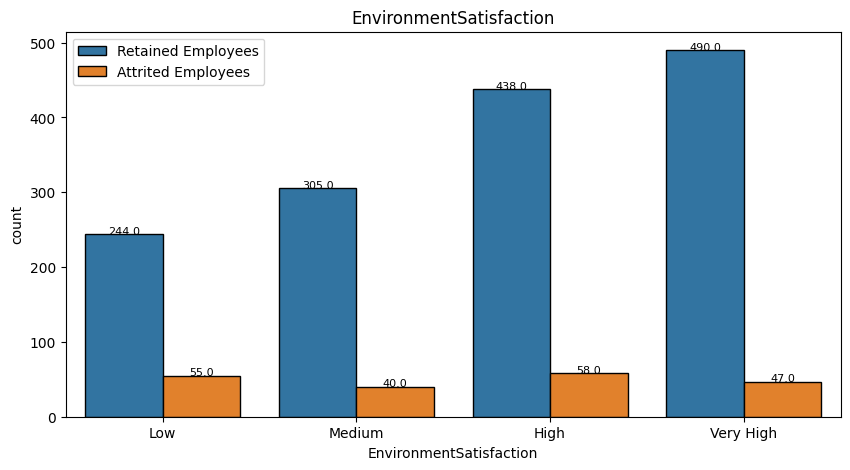

In [ ]:

plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'EnvironmentSatisfaction', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
x = ['Low', 'Medium', 'High', 'Very High']
x_pos = [0, 1, 2, 3]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper left')
plt.title('EnvironmentSatisfaction');

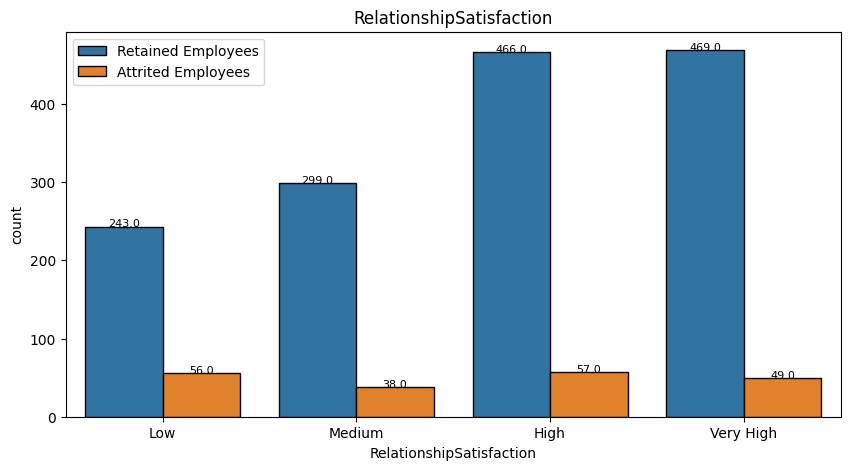

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'RelationshipSatisfaction', data = df1, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
x = ['Low', 'Medium', 'High', 'Very High']
x_pos = [0, 1, 2, 3]
plt.xticks(x_pos,x)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper left')
plt.title('RelationshipSatisfaction');

### Finances

The columns grouped under this catagory are:

1. MonthlyIncome
2. HourlyRate
3. DailyRate
4. MonthlyRate

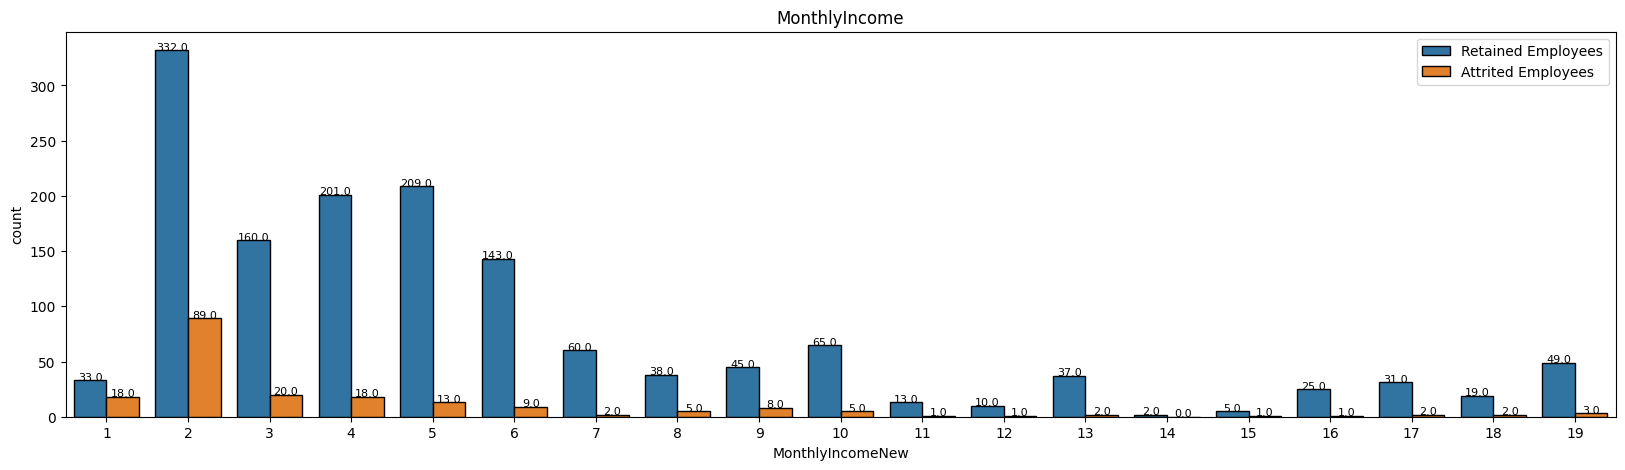

In [ ]:
df = pd.DataFrame()
df['Attrition'] = df1['Attrition']
df['MonthlyIncomeNew'] = [int(i / 1000) for i in df1['MonthlyIncome']]
plt.figure(figsize = (20,5))
ax = sns.countplot(x = 'MonthlyIncomeNew', data = df, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('MonthlyIncome');

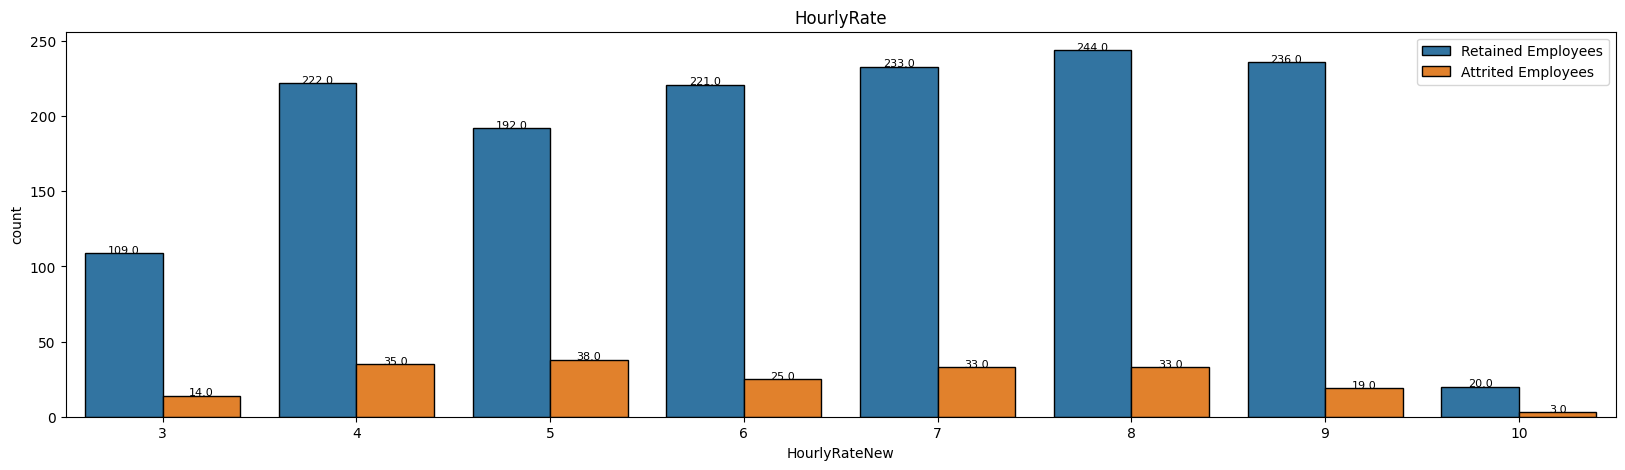

In [ ]:
df['HourlyRateNew'] = [int(i / 10) for i in df1['HourlyRate']]
plt.figure(figsize = (20,5))
ax = sns.countplot(x = 'HourlyRateNew', data = df, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('HourlyRate');

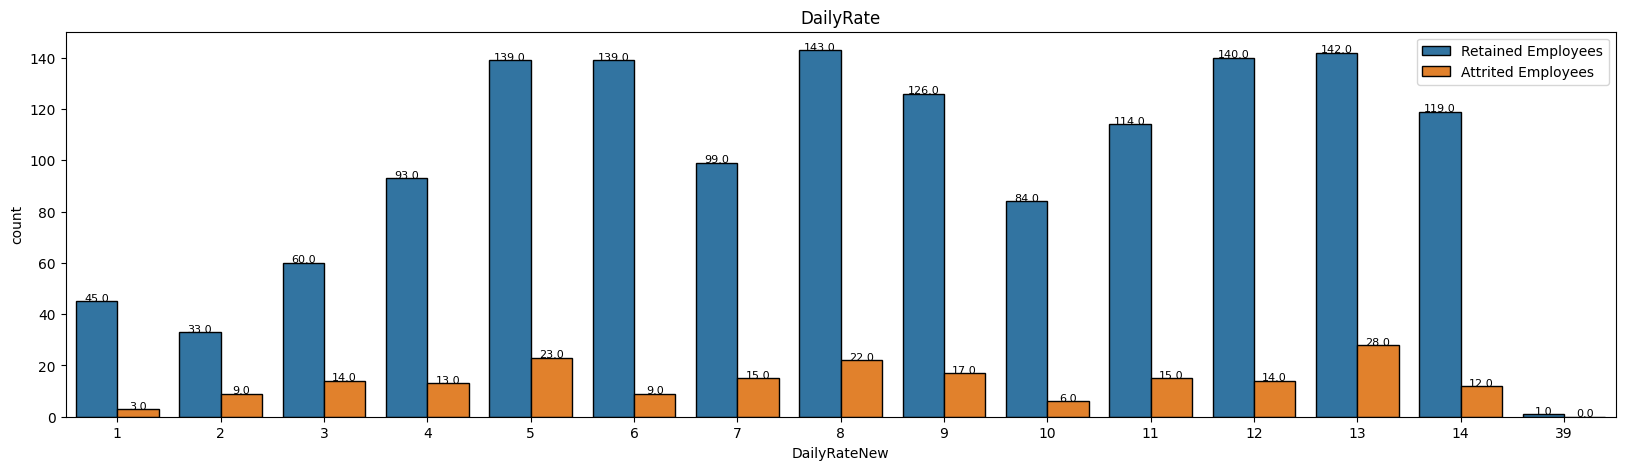

In [ ]:
df['DailyRateNew'] = [int(i / 100) for i in df1['DailyRate']]
plt.figure(figsize = (20,5))
ax = sns.countplot(x = 'DailyRateNew', data = df, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('DailyRate');

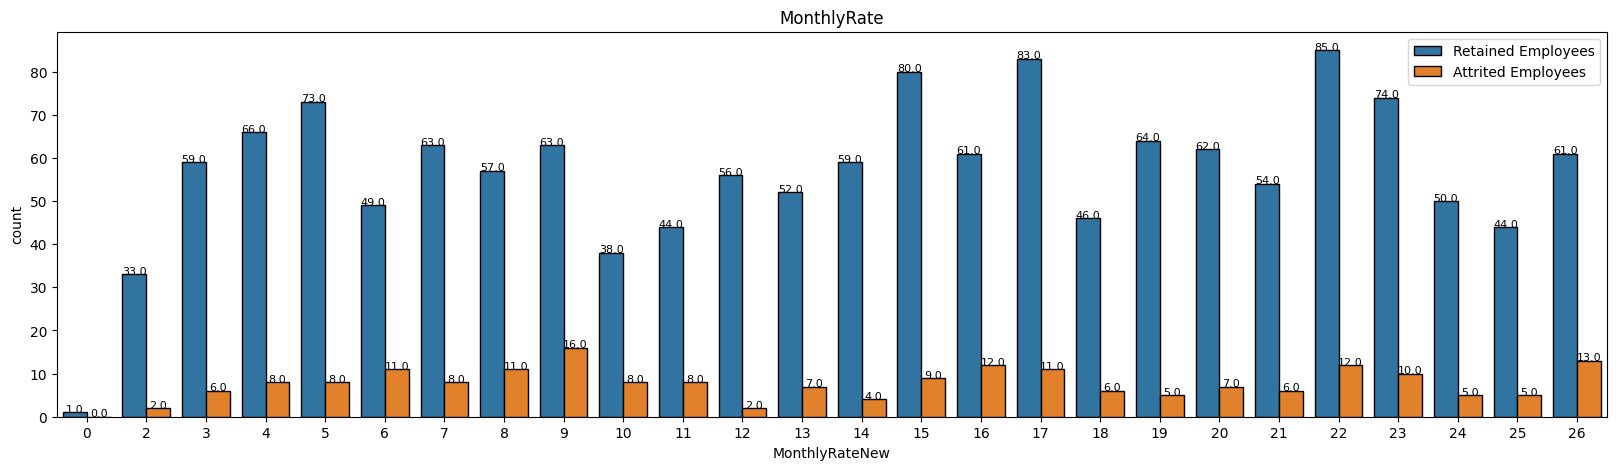

In [ ]:
df['MonthlyRateNew'] = [int(i / 1000) for i in df1['MonthlyRate']]
plt.figure(figsize = (20,5))
ax = sns.countplot(x = 'MonthlyRateNew', data = df, hue = 'Attrition', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 8)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('MonthlyRate');

# Dropping unnecessary features

In [ ]:
df1.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours', 'id'], inplace = True)

# Feature Selection and Engineering

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
cols = list(df1.columns)
cols.remove('Attrition')

over = SMOTE(sampling_strategy = 0.85)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,cols]
t1 = df1.loc[:,'Attrition']

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 1477, 1: 1255})

### Selecting catagorical features based on Chi Square Test:

In [ ]:
features = df1.drop('Attrition', axis = 1)
features = features.drop('Age', axis = 1)
features = features.drop('DailyRate', axis = 1)
features = features.drop('DistanceFromHome', axis = 1)
features = features.drop('HourlyRate', axis = 1)
features = features.drop('MonthlyIncome', axis = 1)
features = features.drop('MonthlyRate', axis = 1)
features = features.drop('NumCompaniesWorked', axis = 1)
features = features.drop('PercentSalaryHike', axis = 1)
features = features.drop('TotalWorkingYears', axis = 1)
features = features.drop('TrainingTimesLastYear', axis = 1)
features = features.drop('YearsAtCompany', axis = 1)
features = features.drop('YearsInCurrentRole', axis = 1)
features = features.drop('YearsSinceLastPromotion', axis = 1)
features = features.drop('YearsWithCurrManager', axis = 1)
target = df1['Attrition']

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi_scores = chi2(features, target)

In [ ]:
chi_scores

(array([1.09396526e-04, 3.24572800e-01, 6.35802703e+00, 5.21293398e-02,
        9.62051773e+00, 1.10379158e+00, 7.79491800e+00, 3.69849564e+01,
        1.75167040e+00, 4.19266471e+00, 2.29694051e+01, 3.86468837e+01,
        2.73229013e-01, 8.52020682e+00, 5.20125388e+01, 8.17621175e-01]),
 array([9.91654855e-01, 5.68872432e-01, 1.16851409e-02, 8.19398639e-01,
        1.92415483e-03, 2.93435513e-01, 5.23933884e-03, 1.19044182e-09,
        1.85666878e-01, 4.05992344e-02, 1.64600234e-06, 5.07842760e-10,
        6.01173902e-01, 3.51224572e-03, 5.51473526e-13, 3.65876598e-01]))

<Axes: >

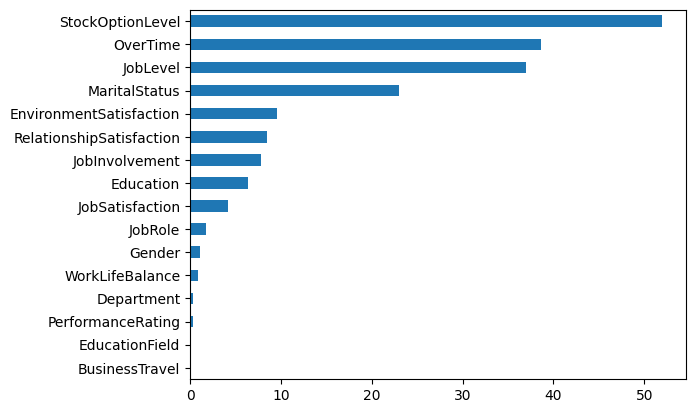

In [ ]:
chi_values = pd.Series(chi_scores[0], index = features.columns)
chi_values.sort_values(ascending = True, inplace = True)
chi_values.plot.barh()

In [ ]:
#Dropping JobRole, Gender, WorkLifeBalance, Department, PerformanceRating, EducationField, BusinessTravel based on chi squared test.
df1 = df1.drop('JobRole', axis = 1)
df1 = df1.drop('Gender', axis = 1)
df1 = df1.drop('WorkLifeBalance', axis = 1)
df1 = df1.drop('Department', axis = 1)
df1 = df1.drop('PerformanceRating', axis = 1)
df1 = df1.drop('EducationField', axis = 1)
df1 = df1.drop('BusinessTravel', axis = 1)

### Selecting numerical features based on Anova Test:

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
features = df1.drop('Attrition', axis = 1)
features = features.drop('Education', axis = 1)
features = features.drop('EnvironmentSatisfaction', axis = 1)
features = features.drop('JobInvolvement', axis = 1)
features = features.drop('JobLevel', axis = 1)
features = features.drop('JobSatisfaction', axis = 1)
features = features.drop('MaritalStatus', axis = 1)
features = features.drop('OverTime', axis = 1)
features = features.drop('RelationshipSatisfaction', axis = 1)
features = features.drop('StockOptionLevel', axis = 1)
target = df1['Attrition']

In [ ]:
anova_scores = f_classif(features, target)

In [ ]:
anova_scores

(array([44.59818532,  0.83937296,  1.02596424,  2.33112412, 27.41345309,
         0.05038253,  2.31202915,  1.6711593 , 32.87466733,  0.57937254,
        27.5118848 , 30.37817392,  2.48598005, 26.46301383]),
 array([3.28094225e-11, 3.59708049e-01, 3.11254729e-01, 1.26999069e-01,
        1.85036936e-07, 8.22426353e-01, 1.28565103e-01, 1.96281614e-01,
        1.16373553e-08, 4.46665513e-01, 1.75999612e-07, 4.10963251e-08,
        1.15053610e-01, 3.00215652e-07]))

<Axes: >

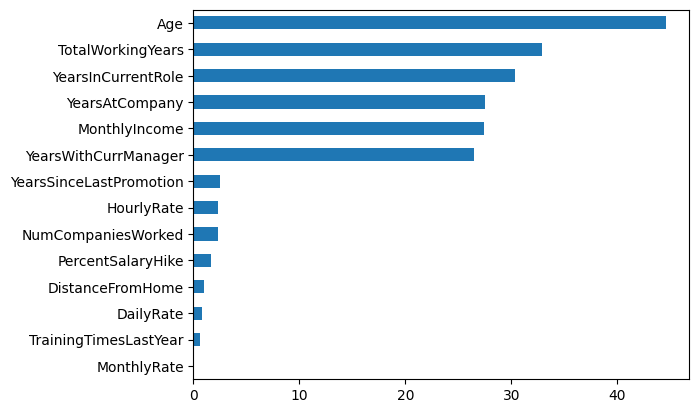

In [ ]:
anova_values = pd.Series(anova_scores[0], index = features.columns)
anova_values.sort_values(ascending = True, inplace = True)
anova_values.plot.barh()

In [ ]:
df1 = df1.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate', 'TrainingTimesLastYear'])

In [ ]:
df1.columns

Index(['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

### Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
df1['MonthlyIncome'] = mms.fit_transform(df1[['MonthlyIncome']])
df1['TotalWorkingYears'] = mms.fit_transform(df1[['TotalWorkingYears']])
df1['YearsAtCompany'] = mms.fit_transform(df1[['YearsAtCompany']])
df1['YearsInCurrentRole'] = mms.fit_transform(df1[['YearsInCurrentRole']])
df1['YearsWithCurrManager'] = mms.fit_transform(df1[['YearsWithCurrManager']])

# Standardization
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['Education'] = ss.fit_transform(df1[['Education']])
df1['EnvironmentSatisfaction'] = ss.fit_transform(df1[['EnvironmentSatisfaction']])
df1['JobInvolvement'] = ss.fit_transform(df1[['JobInvolvement']])
df1['JobLevel'] = ss.fit_transform(df1[['JobLevel']])
df1['JobSatisfaction'] = ss.fit_transform(df1[['JobSatisfaction']])
df1['OverTime'] = ss.fit_transform(df1[['OverTime']])
df1['RelationshipSatisfaction'] = ss.fit_transform(df1[['RelationshipSatisfaction']])
df1['StockOptionLevel'] = ss.fit_transform(df1[['StockOptionLevel']])

# Modelling

### Splitting

In [ ]:
X = df1.drop('Attrition', axis = 1)
y = df1['Attrition']

In [ ]:
from sklearn.model_selection import train_test_split

# split train data into two parts :  train - 80% and validation - 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=321)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


def model(classifier,X_train,y_train,X_val,y_val):

    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)

def model_evaluation(classifier,X_val,y_val):

    cv_score = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy").mean()*100
    print('Cross-validation Score: ', cv_score, '\n')
    print(classification_report(y_val,classifier.predict(X_val)))

###XGB Classifier

In [ ]:
 from xgboost import XGBClassifier
 classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 4,n_estimators = 1000)

In [ ]:
model(classifier_xgb,X_train.values,y_train.values,X_val.values,y_val.values)
model_evaluation(classifier_xgb,X_val.values,y_val.values)

Cross-validation Score:  88.44168048645659 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       293
           1       0.62      0.23      0.34        43

    accuracy                           0.88       336
   macro avg       0.76      0.61      0.64       336
weighted avg       0.86      0.88      0.86       336



###LGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 4,n_estimators = 1000)

In [ ]:
model(classifier_lgbm,X_train.values,y_train.values,X_val.values,y_val.values)
model_evaluation(classifier_lgbm,X_val.values,y_val.values)

Cross-validation Score:  89.41072415699281 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       293
           1       0.55      0.26      0.35        43

    accuracy                           0.88       336
   macro avg       0.72      0.61      0.64       336
weighted avg       0.85      0.88      0.86       336



### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 321,max_depth = 4,min_samples_leaf = 1)

In [ ]:
model(classifier_dt,X_train.values,y_train.values,X_val.values,y_val.values)
model_evaluation(classifier_dt,X_val.values,y_val.values)

Cross-validation Score:  87.17689331122166 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       293
           1       0.29      0.12      0.17        43

    accuracy                           0.85       336
   macro avg       0.59      0.54      0.54       336
weighted avg       0.81      0.85      0.82       336



###RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 321)

In [ ]:
model(classifier_rf,X_train.values,y_train.values,X_val.values,y_val.values)
model_evaluation(classifier_rf,X_val.values,y_val.values)

Cross-validation Score:  88.21835268103925 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       293
           1       0.67      0.09      0.16        43

    accuracy                           0.88       336
   macro avg       0.77      0.54      0.55       336
weighted avg       0.85      0.88      0.84       336



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform hyperparameter optimization using cross-validation
rf_cv = GridSearchCV(rf_classifier, param_grid=rf_param_grid, cv=5)
rf_cv.fit(X_train_resampled, y_train_resampled)

# Get the best Random Forest model
best_rf_model = rf_cv.best_estimator_

# Make predictions on the test set using the best Random Forest model
rf_predictions = best_rf_model.predict(X_val)

# Evaluate the Random Forest model using cross-validation scores and classification report
rf_scores = cross_val_score(best_rf_model, X, y, cv=5)
rf_classification_report = classification_report(y_val, rf_predictions)

print(rf_scores.mean()*100)
print(rf_classification_report)

In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform hyperparameter optimization using cross-validation
dt_cv = GridSearchCV(dt_classifier, param_grid=dt_param_grid, cv=5)
dt_cv.fit(X_train_resampled, y_train_resampled)

# Get the best Decision Tree model
best_dt_model = dt_cv.best_estimator_

# Make predictions on the test set using the best Decision Tree model
dt_predictions = best_dt_model.predict(X_val)

# Evaluate the Decision Tree model using cross-validation scores and classification report
dt_scores = cross_val_score(best_dt_model, X, y, cv=5)
dt_classification_report = classification_report(y_val, dt_predictions)

print(dt_scores.mean()*100)
print(dt_classification_report)

In [ ]:
# LightGBM Classifier
lgb_classifier = LGBMClassifier()

# Define the hyperparameter grid for LightGBM
lgb_param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 10, 15],
    'num_leaves': [30, 50, 100],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Perform hyperparameter optimization using cross-validation
lgb_cv = GridSearchCV(lgb_classifier, param_grid=lgb_param_grid, cv=5)
lgb_cv.fit(X_train_resampled, y_train_resampled)

# Get the best LightGBM model
best_lgb_model = lgb_cv.best_estimator_

# Make predictions on the test set using the best LightGBM model
lgb_predictions = best_lgb_model.predict(X_val)

# Evaluate the LightGBM model using cross-validation scores and classification report
lgb_scores = cross_val_score(best_lgb_model, X, y, cv=5)
lgb_classification_report = classification_report(y_val, lgb_predictions)

print(lgb_scores.mean()*100)
print(lgb_classification_report)

In [ ]:
# XGBoost Classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# Perform hyperparameter optimization using cross-validation
xgb_cv = GridSearchCV(xgb_classifier, param_grid=xgb_param_grid, cv=5)
xgb_cv.fit(X_train_resampled, y_train_resampled)

# Get the best XGBoost model
best_xgb_model = xgb_cv.best_estimator_

# Make predictions on the test set using the best XGBoost model
xgb_predictions = best_xgb_model.predict(X_val)

# Evaluate the XGBoost model using cross-validation scores and classification report
xgb_scores = cross_val_score(best_xgb_model, X, y, cv=5)
xgb_classification_report = classification_report(y_val, xgb_predictions)

print(xgb_scores.mean()*100)
print(xgb_classification_report)